### Importations

In [1]:
## plots :
import matplotlib.pyplot as plt
#%matplotlib qt
%matplotlib inline
from matplotlib.widgets import Cursor
from matplotlib import rc

##
import numpy as np
import seaborn as sns

import sys
sys.path.append('../')

## ML :
from scripts.machine_learning_utils import *
from scripts.models import *
from scripts.descriptors import *


import pandas as pd



rc('font', family='sans-serif', size = 7)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 7)
rc('legend', fontsize=6)
rc('lines', linewidth = 1)
rc('axes', linewidth = 0.5, labelsize =8)
rc('legend', handlelength = 2)

Skipped loading some PyTorch models, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'torch'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


### Get data

In [2]:
df_all_smiles = pd.read_csv('../tables/data/all_possible_smiles_FIA_ONO.csv').set_index('SMILES')

In [4]:
df_sub_sigman_ortho = pd.read_excel('../tables/descriptors/sub_descriptors_sigman.xlsx', sheet_name = 'ortho').set_index("R-ortho")
df_sub_sigman_meta = pd.read_excel('../tables/descriptors/sub_descriptors_sigman.xlsx', sheet_name = 'meta').set_index("R-meta")
df_sub_sigman_para = pd.read_excel('../tables/descriptors/sub_descriptors_sigman.xlsx', sheet_name = 'para').set_index("R-para")
df_sub_hammet = pd.read_excel('../tables/descriptors/substituents_params.xlsx').set_index('sub')

In [6]:
df_groups = pd.read_excel('../tables/descriptors/groups.xlsx').set_index('groups')

### Study substituents

In [11]:
smiles = df_all_smiles.index
group_ortho = []
group_meta = []
group_para = []

for smi in smiles :
    group_ortho.append(id_substructure_ortho(smi, 'ONO'))
    group_meta.append(id_substructure_meta(smi, 'ONO'))
    group_para.append(id_substructure_para(smi, 'ONO'))

df_all_smiles['group ortho']= group_ortho
df_all_smiles['group meta']=group_meta
df_all_smiles['group para']=group_para

In [16]:
df = df_all_smiles
mols = [Chem.MolFromSmiles(smi) for smi in df.index]
groups = [ str((df.at[smi,'group ortho'], df.at[smi,'group meta'], 
                df.at[smi,'group para'])) for smi in df.index]

#Chem.Draw.MolsToGridImage(mols, legends = groups)

## plots

In [8]:
mesomeric_attractive = ['CN', 'NO2']

In [9]:
df = df_all_smiles

In [21]:
FIA_para_meso = df[df['group para'].isin(mesomeric_attractive)].FIA
FIA_para_not_meso = df[~df['group para'].isin(mesomeric_attractive)].FIA

In [23]:
df_plot = df

for smi in df_plot.index:
    if df_plot.loc[smi, 'group para'] in mesomeric_attractive :
        df_plot.loc[smi, 'nature of para group']='$para$ meso. attract.'
    else : df_plot.loc[smi,'nature of para group']='$para$ non meso. attract.'

In [24]:
df_plot

,FIA,group ortho,group meta,group para,nature of para group
SMILES,,,,,
Nc1cc2c(c(N)c1N)OB1Oc3c(cc(N)c(N)c3N)N12,300.179618,NH2,NH2,NH2,$para$ non meso. attract.
Nc1c(O)cc2c(c1N)OB1Oc3c(cc(O)c(N)c3N)N12,313.577284,NH2,NH2,OH,$para$ non meso. attract.
Nc1c(Cl)cc2c(c1N)OB1Oc3c(cc(Cl)c(N)c3N)N12,358.463694,NH2,NH2,Cl,$para$ non meso. attract.
Nc1c(F)cc2c(c1N)OB1Oc3c(cc(F)c(N)c3N)N12,340.218241,NH2,NH2,F,$para$ non meso. attract.
Nc1c(Br)cc2c(c1N)OB1Oc3c(cc(Br)c(N)c3N)N12,358.879091,NH2,NH2,Br,$para$ non meso. attract.
...,...,...,...,...,...
O=[N+]([O-])c1ccc2c(c1[N+](=O)[O-])OB1Oc3c(ccc([N+](=O)[O-])c3[N+](=O)[O-])N12,501.395328,NO2,NO2,H,$para$ non meso. attract.
N#Cc1cc2c(c([N+](=O)[O-])c1[N+](=O)[O-])OB1Oc3c(cc(C#N)c([N+](=O)[O-])c3[N+](=O)[O-])N12,569.757859,NO2,NO2,CN,$para$ meso. attract.
CC(C)(C)c1cc2c(c([N+](=O)[O-])c1[N+](=O)[O-])OB1Oc3c(cc(C(C)(C)C)c([N+](=O)[O-])c3[N+](=O)[O-])N12,492.059279,NO2,NO2,tBu,$para$ non meso. attract.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


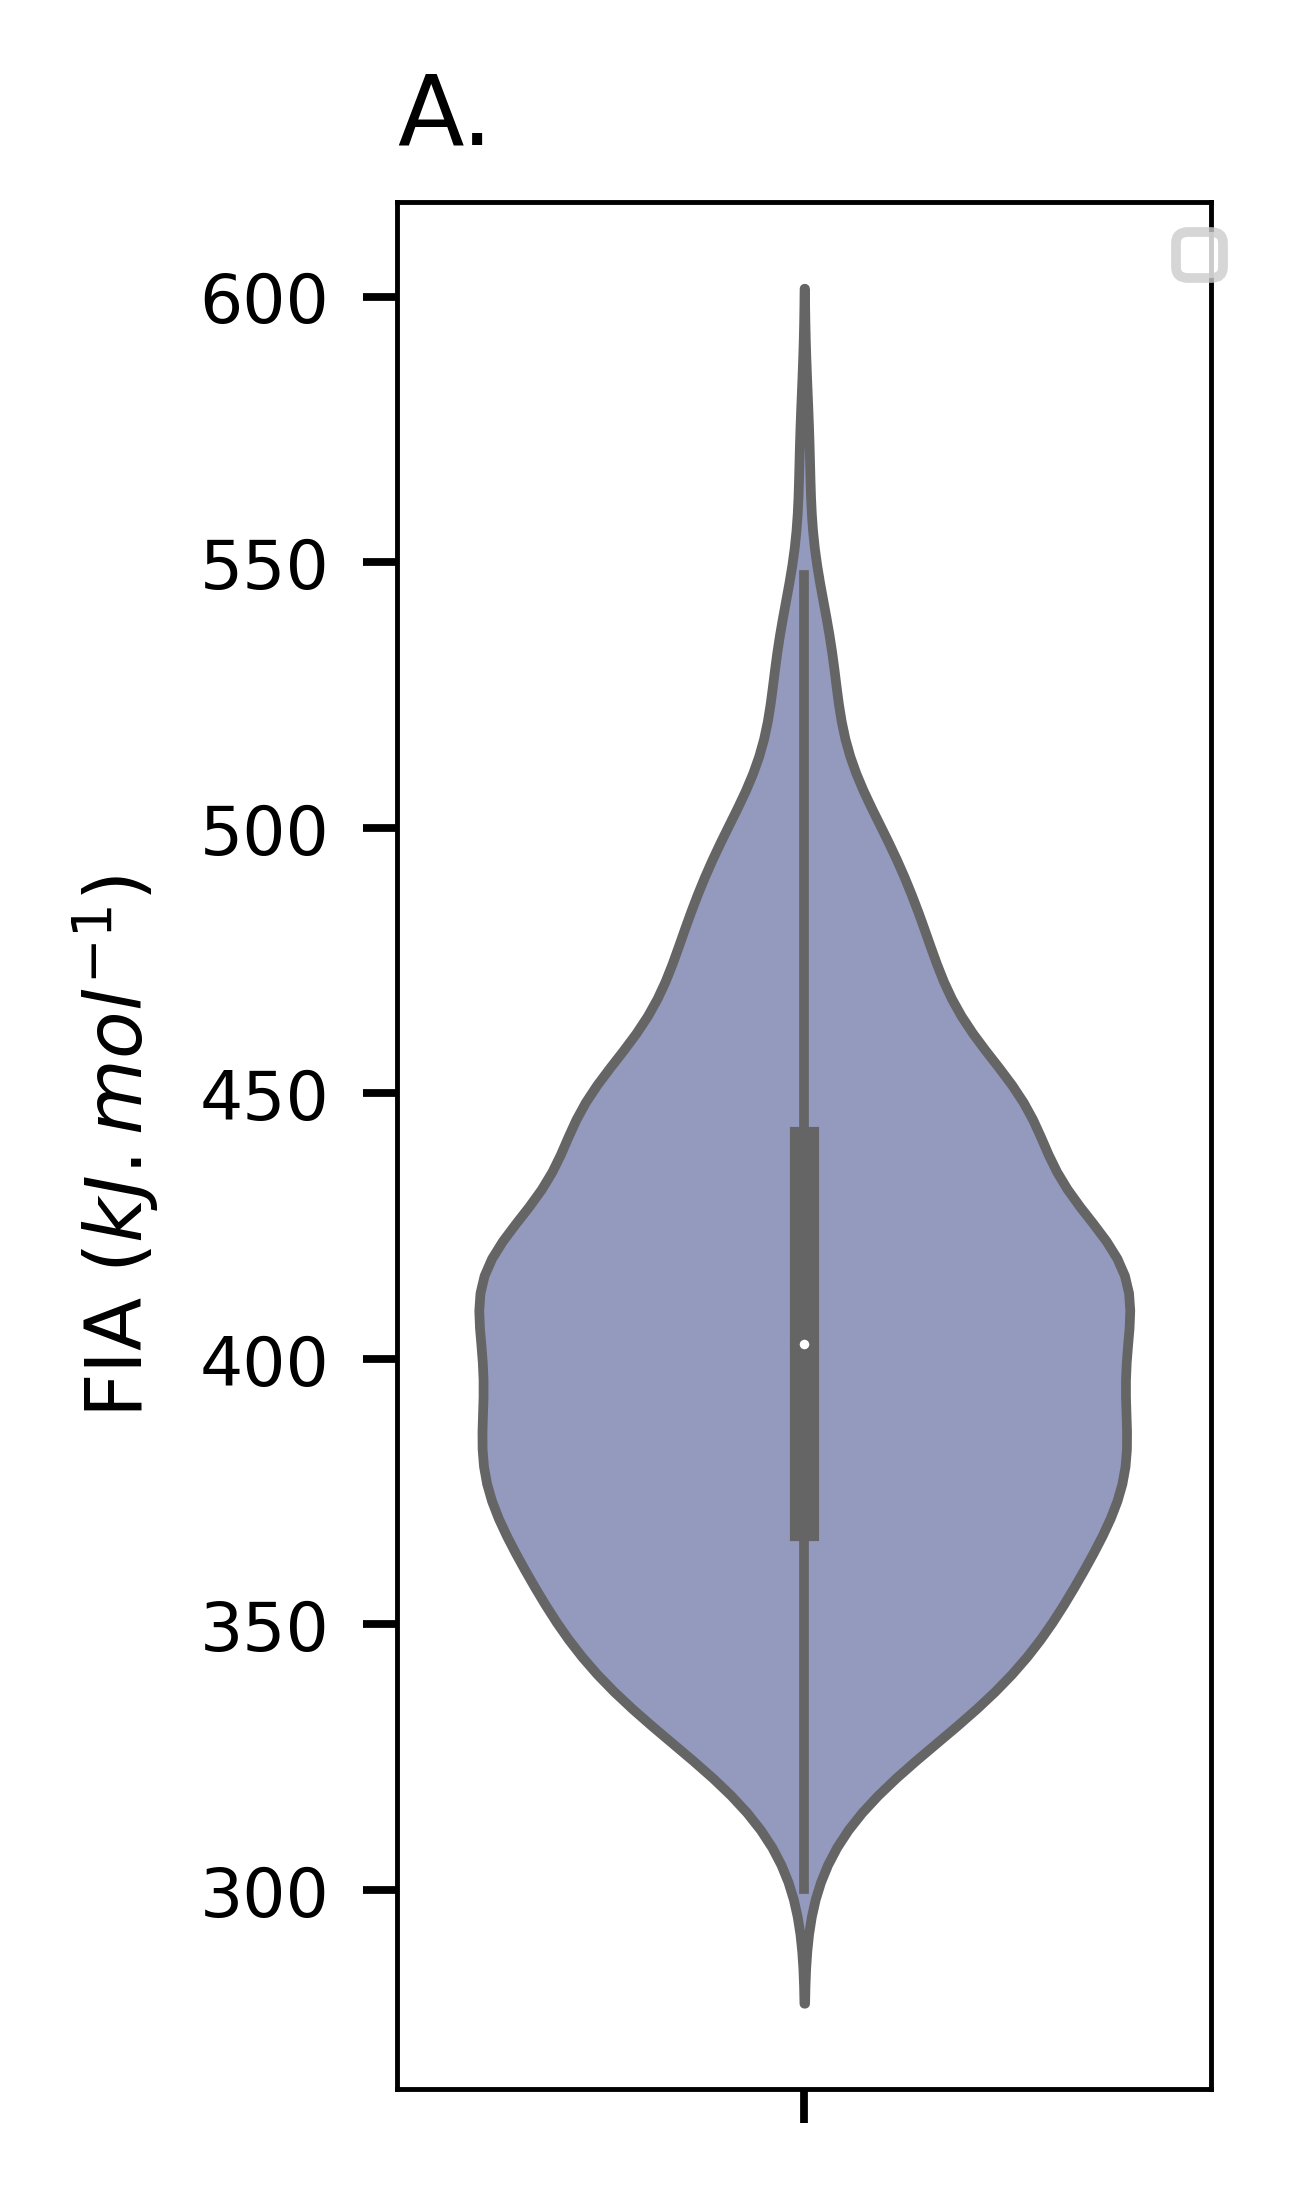

In [26]:
rc('font', family='sans-serif', size = 7)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 7)
rc('legend', fontsize=6)
rc('lines', linewidth = 1)
rc('axes', linewidth = 0.5, labelsize =8)
rc('legend', handlelength = 2)



fig, ax = plt.subplots(figsize = (1.5, 3.5))

sns.violinplot(df_plot, y = 'FIA', hue = 'nature of para group', palette = 'BuPu')

plt.legend(loc='best', bbox_to_anchor=(0.55,0.5, 0.5, 0.5))

plt.ylabel('FIA ($kJ.mol^{-1}$)')


plt.title("A.", loc = 'left', size = 10);


#fig.savefig(f'article/figures/violin_plot_mesomeric_attractive.svg',format = 'svg', transparent = True, bbox_inches='tight')

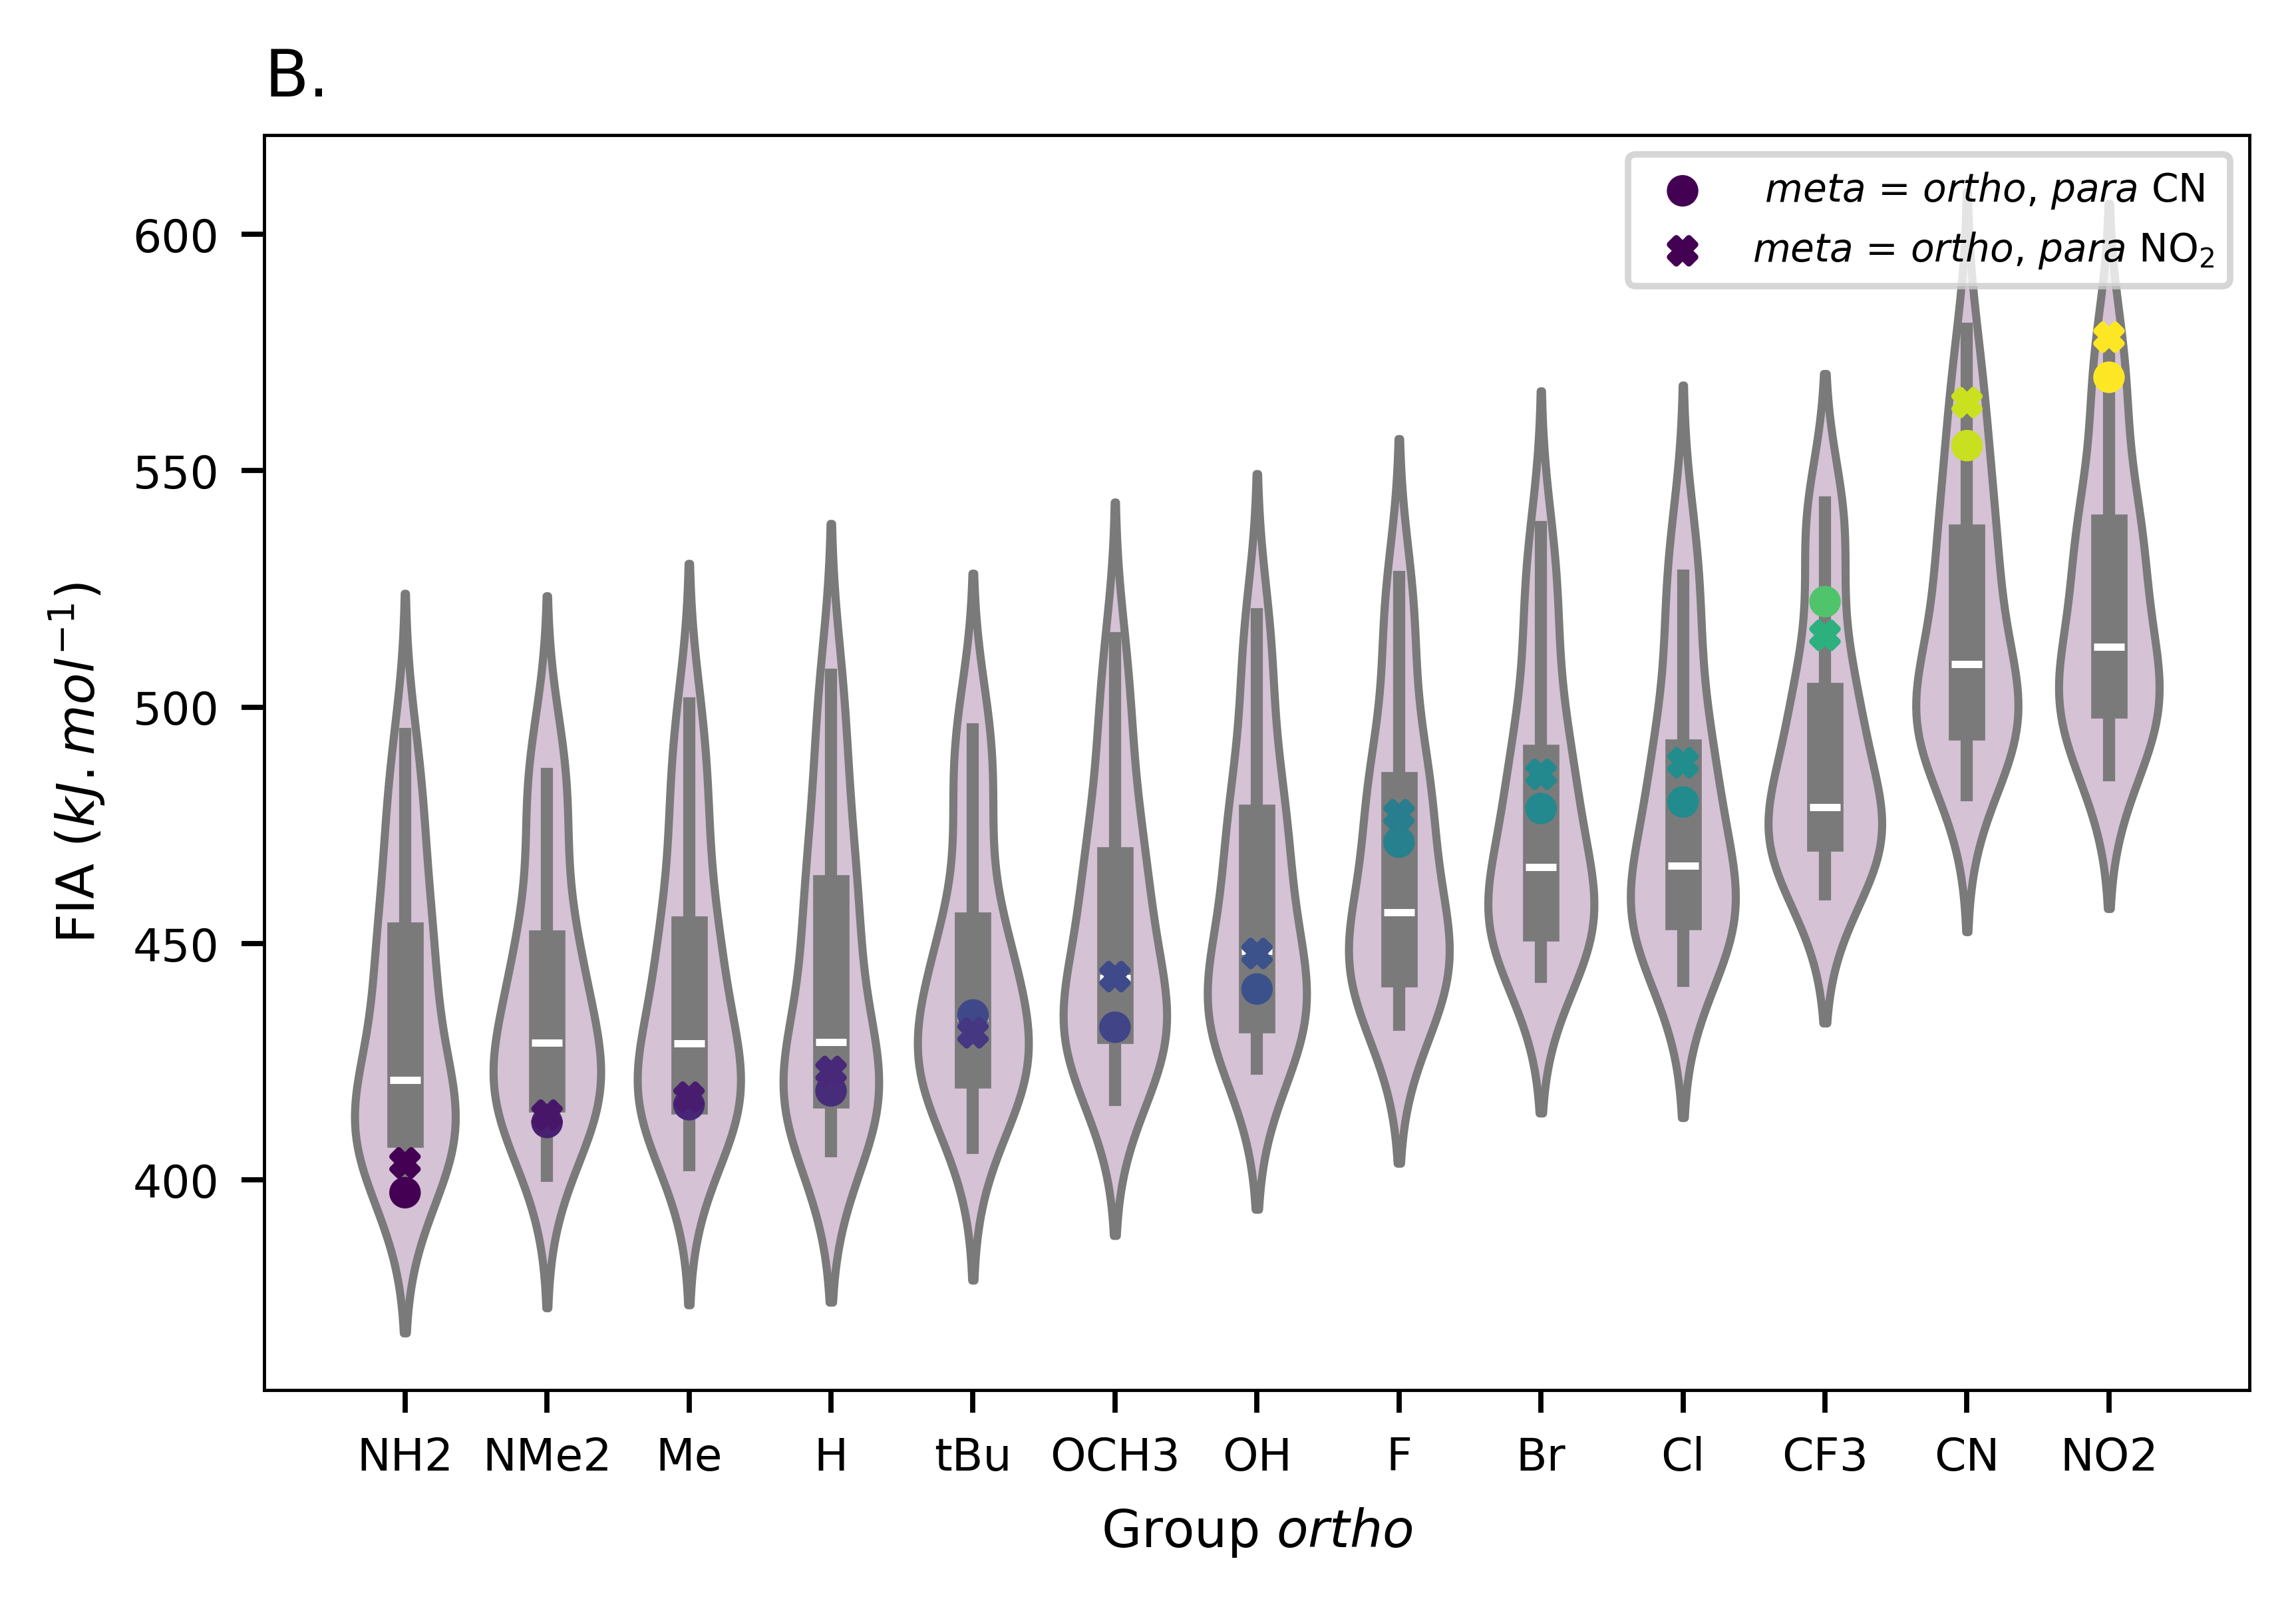

In [36]:
rc('font', family='sans-serif', size = 7)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 7)
rc('legend', fontsize=6)
rc('lines', linewidth = 1)
rc('axes', linewidth = 0.5, labelsize =8)
rc('legend', handlelength = 2)



fig, ax = plt.subplots(figsize = (5.5, 3.5))



df_para_meso = df[df['group para'].isin(mesomeric_attractive)]




mean_FIA = df_para_meso.groupby('group ortho')['FIA'].mean().reset_index()
order_group = mean_FIA.sort_values('FIA')['group ortho'].to_list()

ax = sns.violinplot(df_para_meso, y = 'FIA', x ='group ortho', order = order_group, color = 'thistle' );

df_plot_1 = df[(df['group para'] == 'CN') & (df['group ortho']== df['group meta'])]
ax.scatter( df_plot_1['group ortho'],df_plot_1.FIA, label = ' $meta$ = $ortho$, $para$ CN', c = df_plot_1.FIA, cmap = 'viridis', zorder=5, s = 15)

df_plot_2 = df[(df['group para'] == 'NO2') & (df['group ortho']== df['group meta'])] 
ax.scatter( df_plot_2['group ortho'],df_plot_2.FIA, label = '$meta$ = $ortho$, $para$ NO$_2$',c=df_plot_2.FIA, cmap = 'viridis', zorder=5, s = 15, marker = 'X')

#plt.scatter(y=mean_FIA['FIA'], x=mean_FIA['group ortho'], c= mean_FIA['FIA'], cmap = 'viridis', label='Mean FIA', zorder=5, s = 30, marker = '^')

#ticks = ['NH$_2$', 'NMe$_2$', 'Me', 'H', '$t$Bu', 'OCH$_3$',  'OH', 'F', 'Br', 'Cl', 'CF$_3$', 'CN', 'NO$_2$']
#ax.set_xticks(ax.get_yticks(), label = ticks, fontsize = 13)
ax.set_ylabel('FIA ($kJ.mol^{-1}$)')
ax.set_xlabel("Group $ortho$")

plt.legend(loc = 'upper right')

ax.set_title("B.", loc = 'left', size = 10)

fig.savefig(f'article/figures/group_ortho_distributions_para_meta.svg', format = 'svg', transparent = True, bbox_inches='tight')

In [22]:
for t in ticks: 
    print(t)

NH$_2$
NMe$_2$
Me
H
$t$Bu
OCH$_3$
OH
F
Br
Cl
CF$_3$
CN
NO$_2$


In [23]:
print('FIA ($kJ.mol^{-1}$)')

FIA ($kJ.mol^{-1}$)


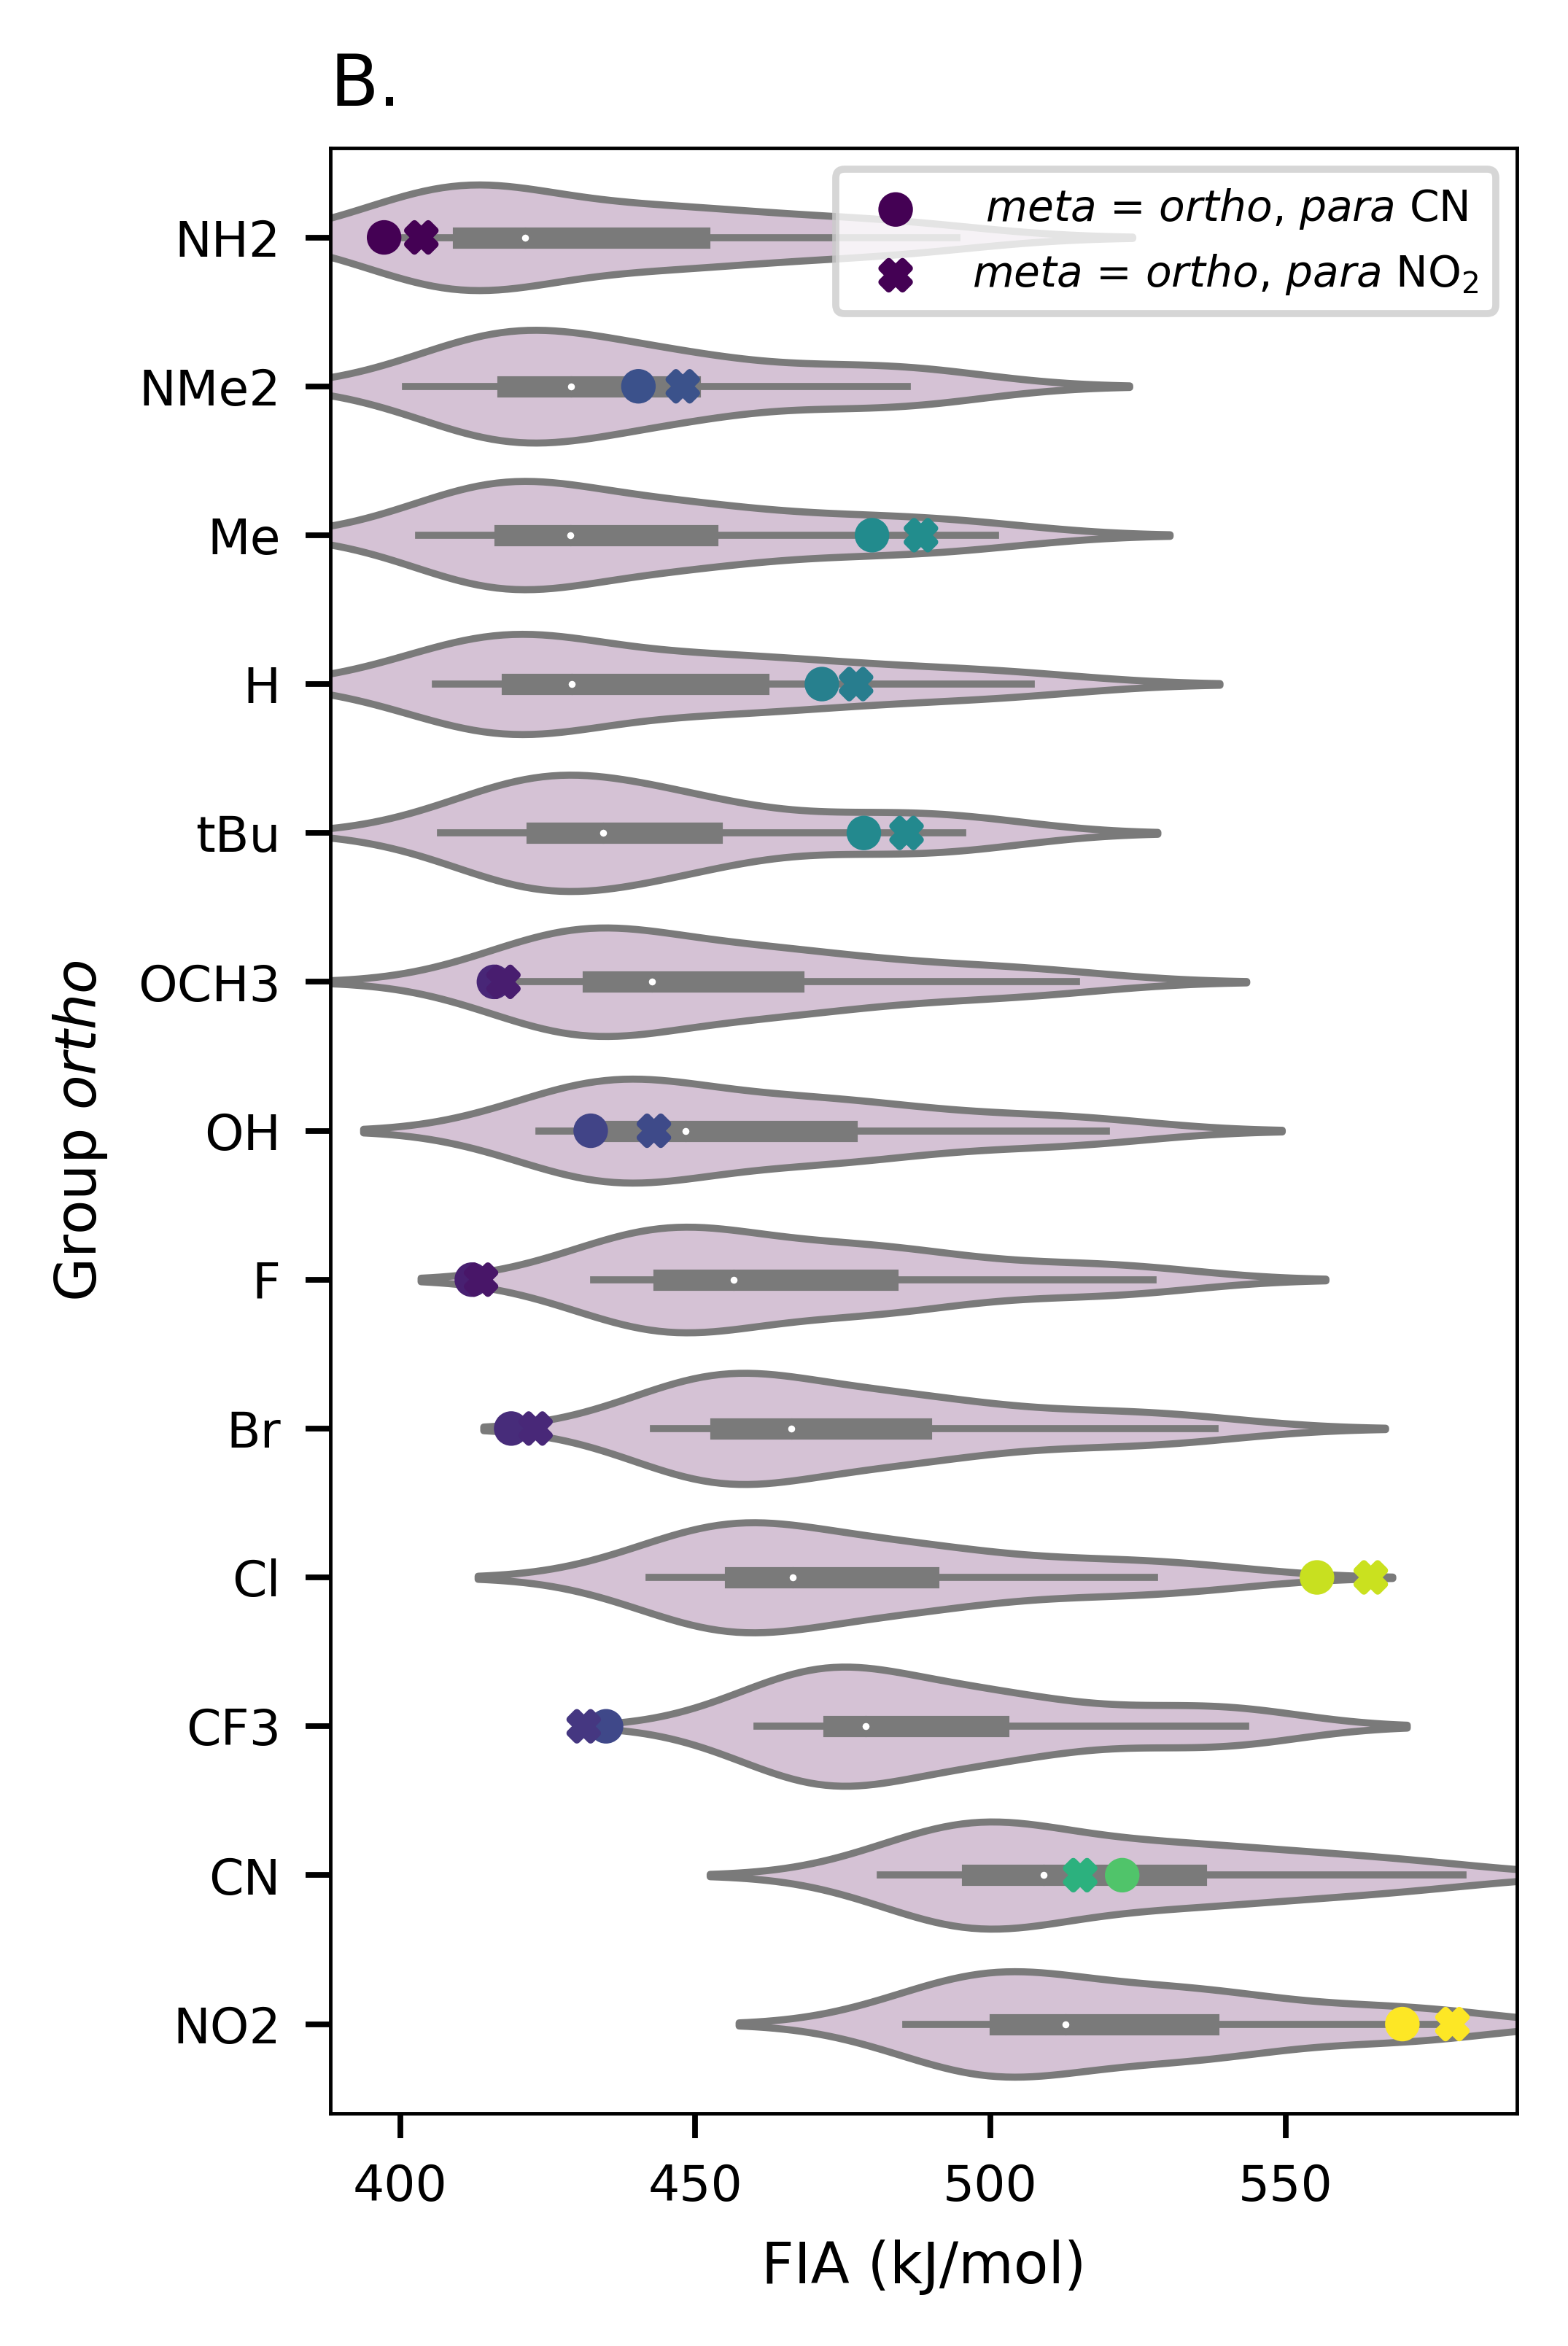

In [17]:
rc('font', family='sans-serif', size = 7)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 7)
rc('legend', fontsize=6)
rc('lines', linewidth = 1)
rc('axes', linewidth = 0.5, labelsize =8)
rc('legend', handlelength = 2)



fig, ax = plt.subplots(figsize = (3, 5))



df_para_meso = df[df['group para'].isin(mesomeric_attractive)]




mean_FIA = df_para_meso.groupby('group ortho')['FIA'].mean().reset_index()
order_group = mean_FIA.sort_values('FIA')['group ortho'].to_list()

ax = sns.violinplot(df_para_meso, x = 'FIA', y ='group ortho', order = order_group, color = 'thistle' );

df_plot_1 = df[(df['group para'] == 'CN') & (df['group ortho']== df['group meta'])]
ax.scatter(df_plot_1.FIA, df_plot_1['group ortho'], label = ' $meta$ = $ortho$, $para$ CN', c = df_plot_1.FIA, cmap = 'viridis', zorder=5, s = 15)

df_plot_2 = df[(df['group para'] == 'NO2') & (df['group ortho']== df['group meta'])] 
ax.scatter(df_plot_2.FIA, df_plot_2['group ortho'], label = '$meta$ = $ortho$, $para$ NO$_2$',c=df_plot_2.FIA, cmap = 'viridis', zorder=5, s = 15, marker = 'X')

#plt.scatter(y=mean_FIA['FIA'], x=mean_FIA['group ortho'], c= mean_FIA['FIA'], cmap = 'viridis', label='Mean FIA', zorder=5, s = 30, marker = '^')

ticks = ['NH$_2$', 'NMe$_2$', 'Me', 'H', '$t$Bu', 'OCH$_3$',  'OH', 'F', 'Br', 'Cl', 'CF$_3$', 'CN', 'NO$_2$']
#ax.set_yticks(ax.get_yticks(), label = ticks, fontsize = 13)
ax.set_xlabel('FIA (kJ/mol)')
ax.set_ylabel("Group $ortho$")

plt.legend(loc = 'upper right')

ax.set_title("B.", loc = 'left', size = 10)

fig.savefig(f'article/figures/group_ortho_distributions_para_meta.svg', format = 'svg', transparent = True, bbox_inches='tight')

Text(0.0, 1.0, 'A.')

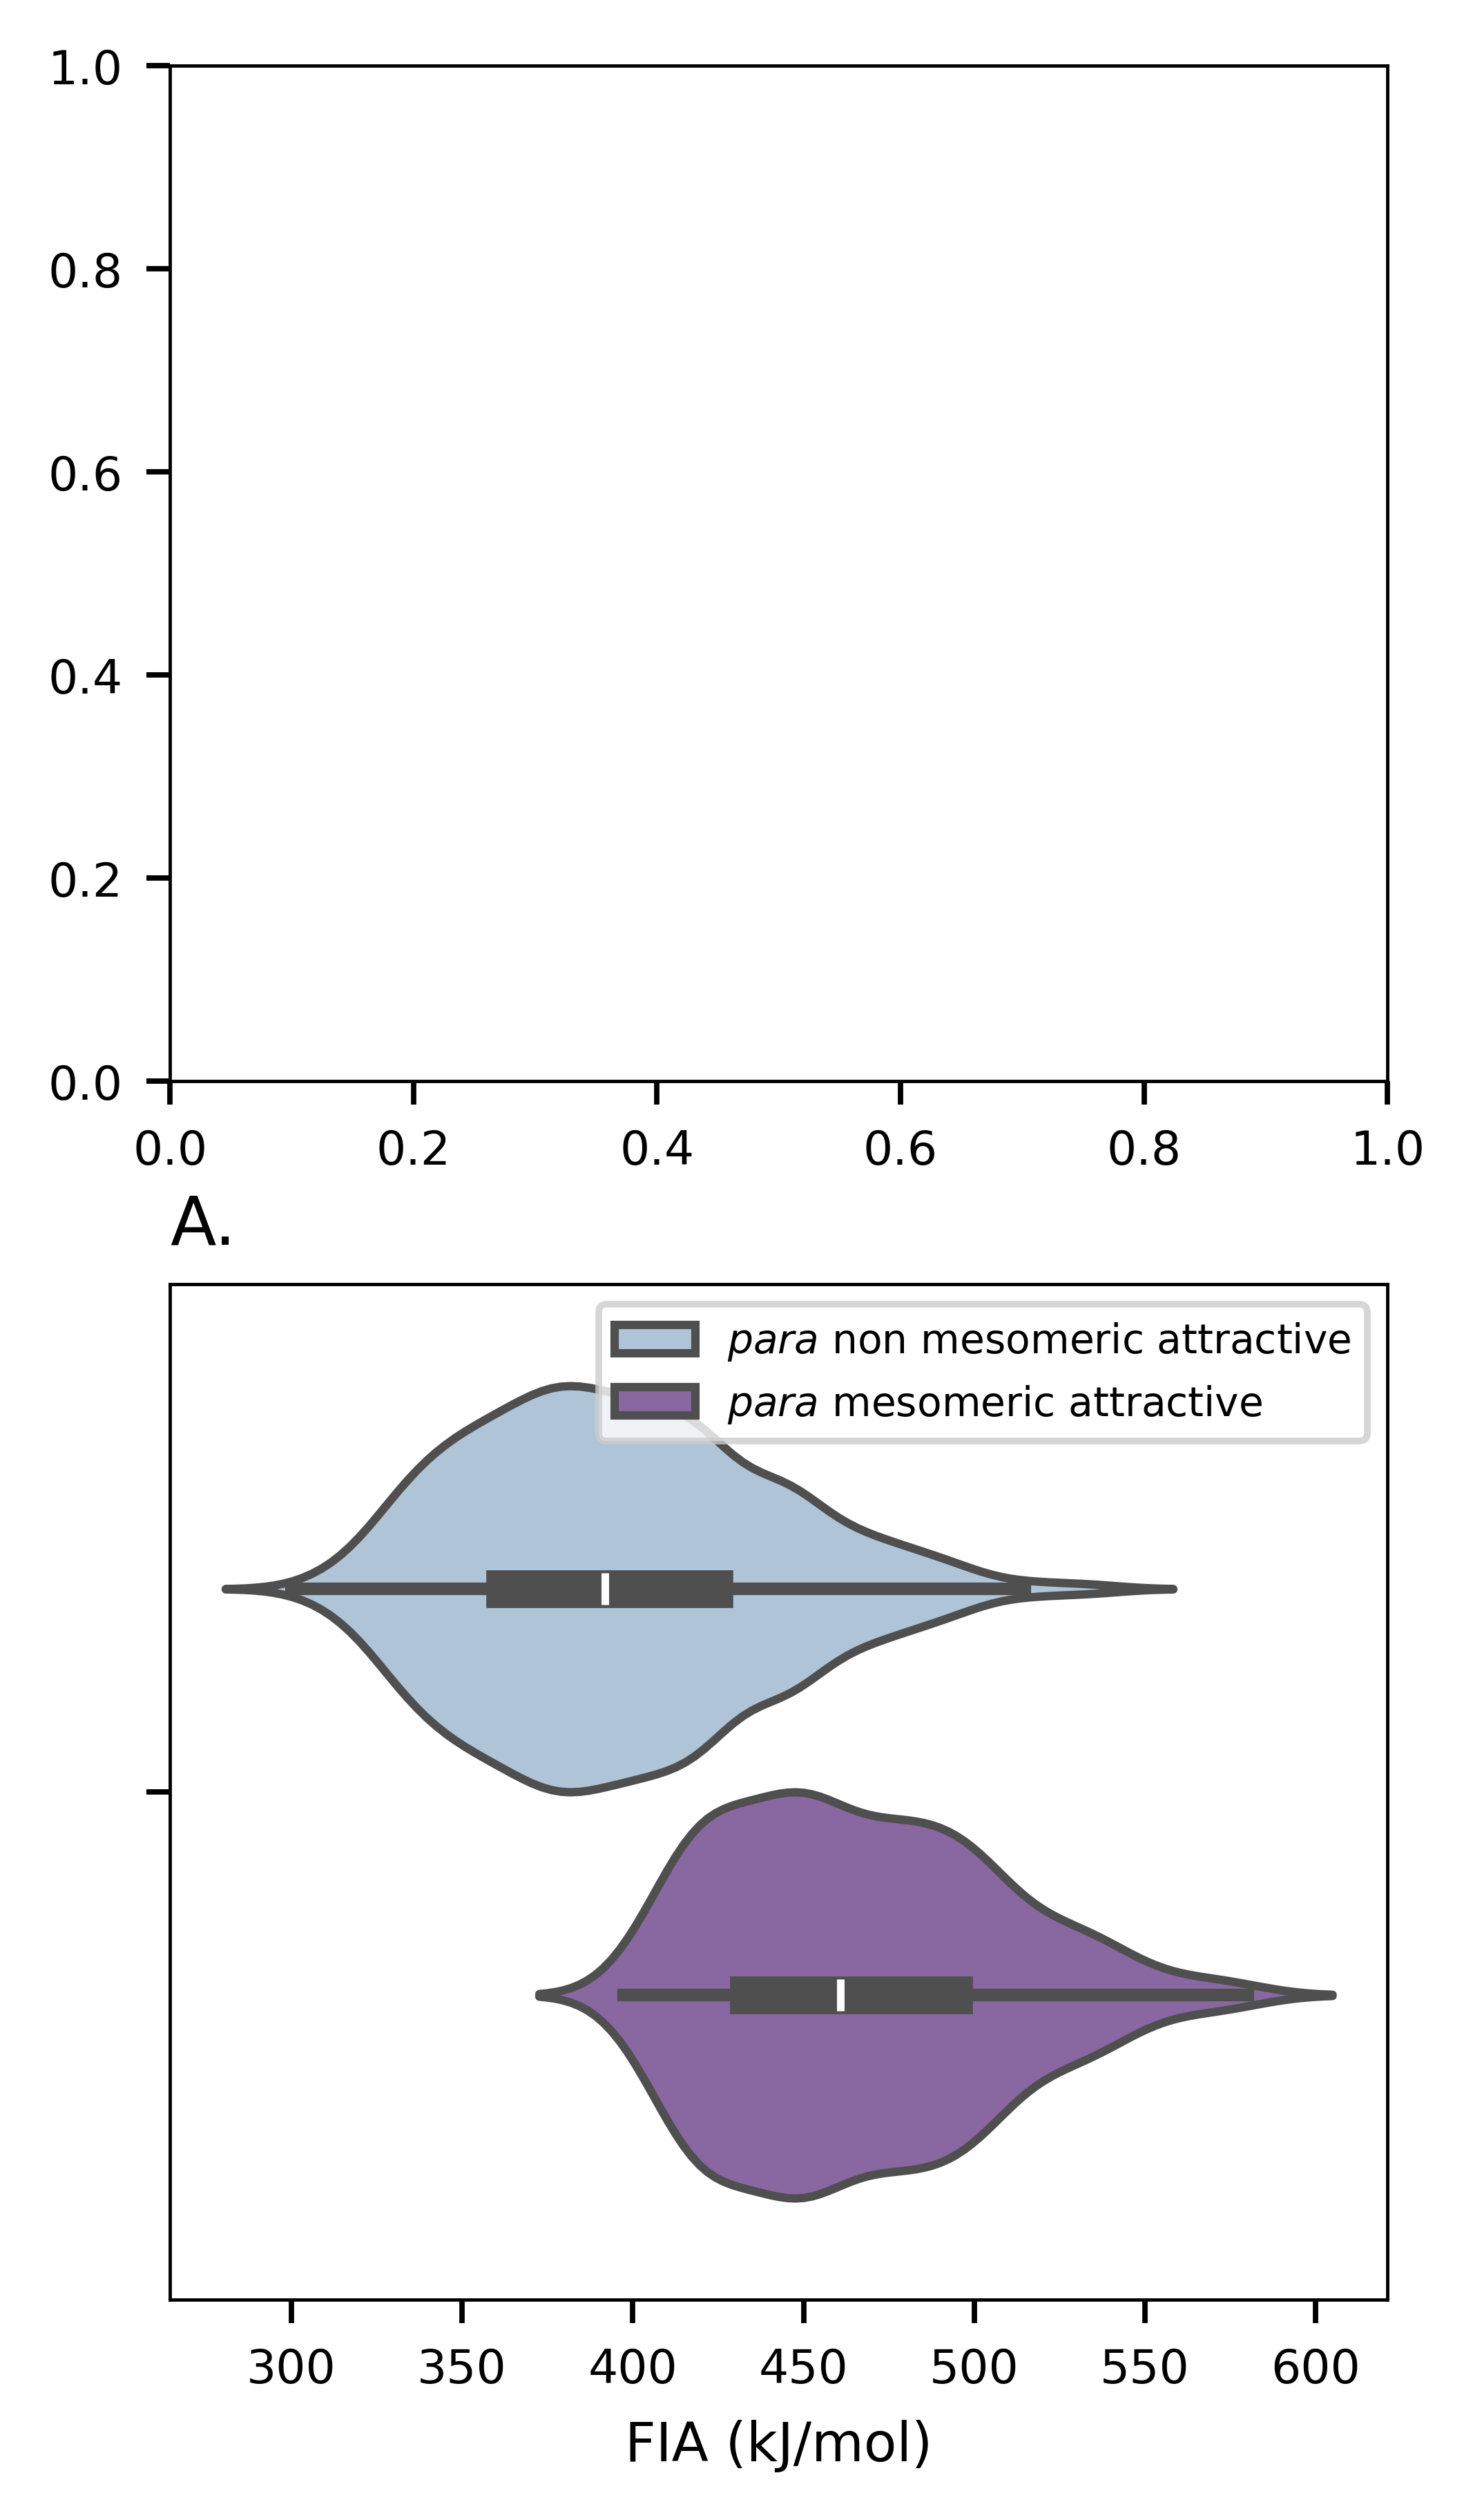

In [31]:
rc('font', family='sans-serif', size = 7)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 7)
rc('legend', fontsize=6)
rc('lines', linewidth = 1)
rc('axes', linewidth = 0.5, labelsize =8)
rc('legend', handlelength = 2)


fig = plt.figure(figsize=(3.25, 6))

ax1 = plt.subplot2grid((2, 1), (0, 0))

ax2 = plt.subplot2grid((2, 1), (1, 0))


ax1 = sns.violinplot(df_plot, x = 'FIA', hue = 'nature of para group', palette = 'BuPu')

#plt.legend(fontsize = 6)

ax1.set_xlabel('FIA (kJ/mol)')

ax1.legend()


ax1.set_title("A.", loc = 'left', size = 10)




df_para_meso = df[df['group para'].isin(mesomeric_attractive)]

mean_FIA = df_para_meso.groupby('group ortho')['FIA'].mean().reset_index()
order_group = mean_FIA.sort_values('FIA')['group ortho'].to_list()

ax2 = sns.violinplot(df_para_meso, x = 'FIA', y ='group ortho', order = order_group, color = 'thistle' )

df_plot_1 = df[(df['group para'] == 'CN') & (df['group ortho']== df['group meta'])]
ax2.scatter(df_plot_1.FIA, df_plot_1['group ortho'], label = ' $meta$ = $ortho$, $para$ CN', c = df_plot_1.FIA, cmap = 'viridis', zorder=5, s = 30)

df_plot_2 = df[(df['group para'] == 'NO2') & (df['group ortho']== df['group meta'])] 
ax2.scatter(df_plot_2.FIA, df_plot_2['group ortho'], label = '$meta$ = $ortho$, $para$ NO$_2$',c=df_plot_2.FIA, cmap = 'viridis', zorder=5, s = 30, marker = 'X')

#plt.scatter(y=mean_FIA['FIA'], x=mean_FIA['group ortho'], c= mean_FIA['FIA'], cmap = 'viridis', label='Mean FIA', zorder=5, s = 30, marker = '^')

ticks = ['NH$_2$', 'NMe$_2$', 'Me', 'H', '$t$Bu', 'OCH$_3$',  'OH', 'F', 'Br', 'Cl', 'CF$_3$', 'CN', 'NO$_2$']
ax2.set_yticks(ax.get_yticks(), label = ticks, fontsize = 13)
ax2.set_xlabel('FIA (kJ/mol)')
ax2.set_ylabel("Group $ortho$")

ax2.legend(loc = 'lower right')

ax2.set_title("B.", loc = 'left', size = 10)


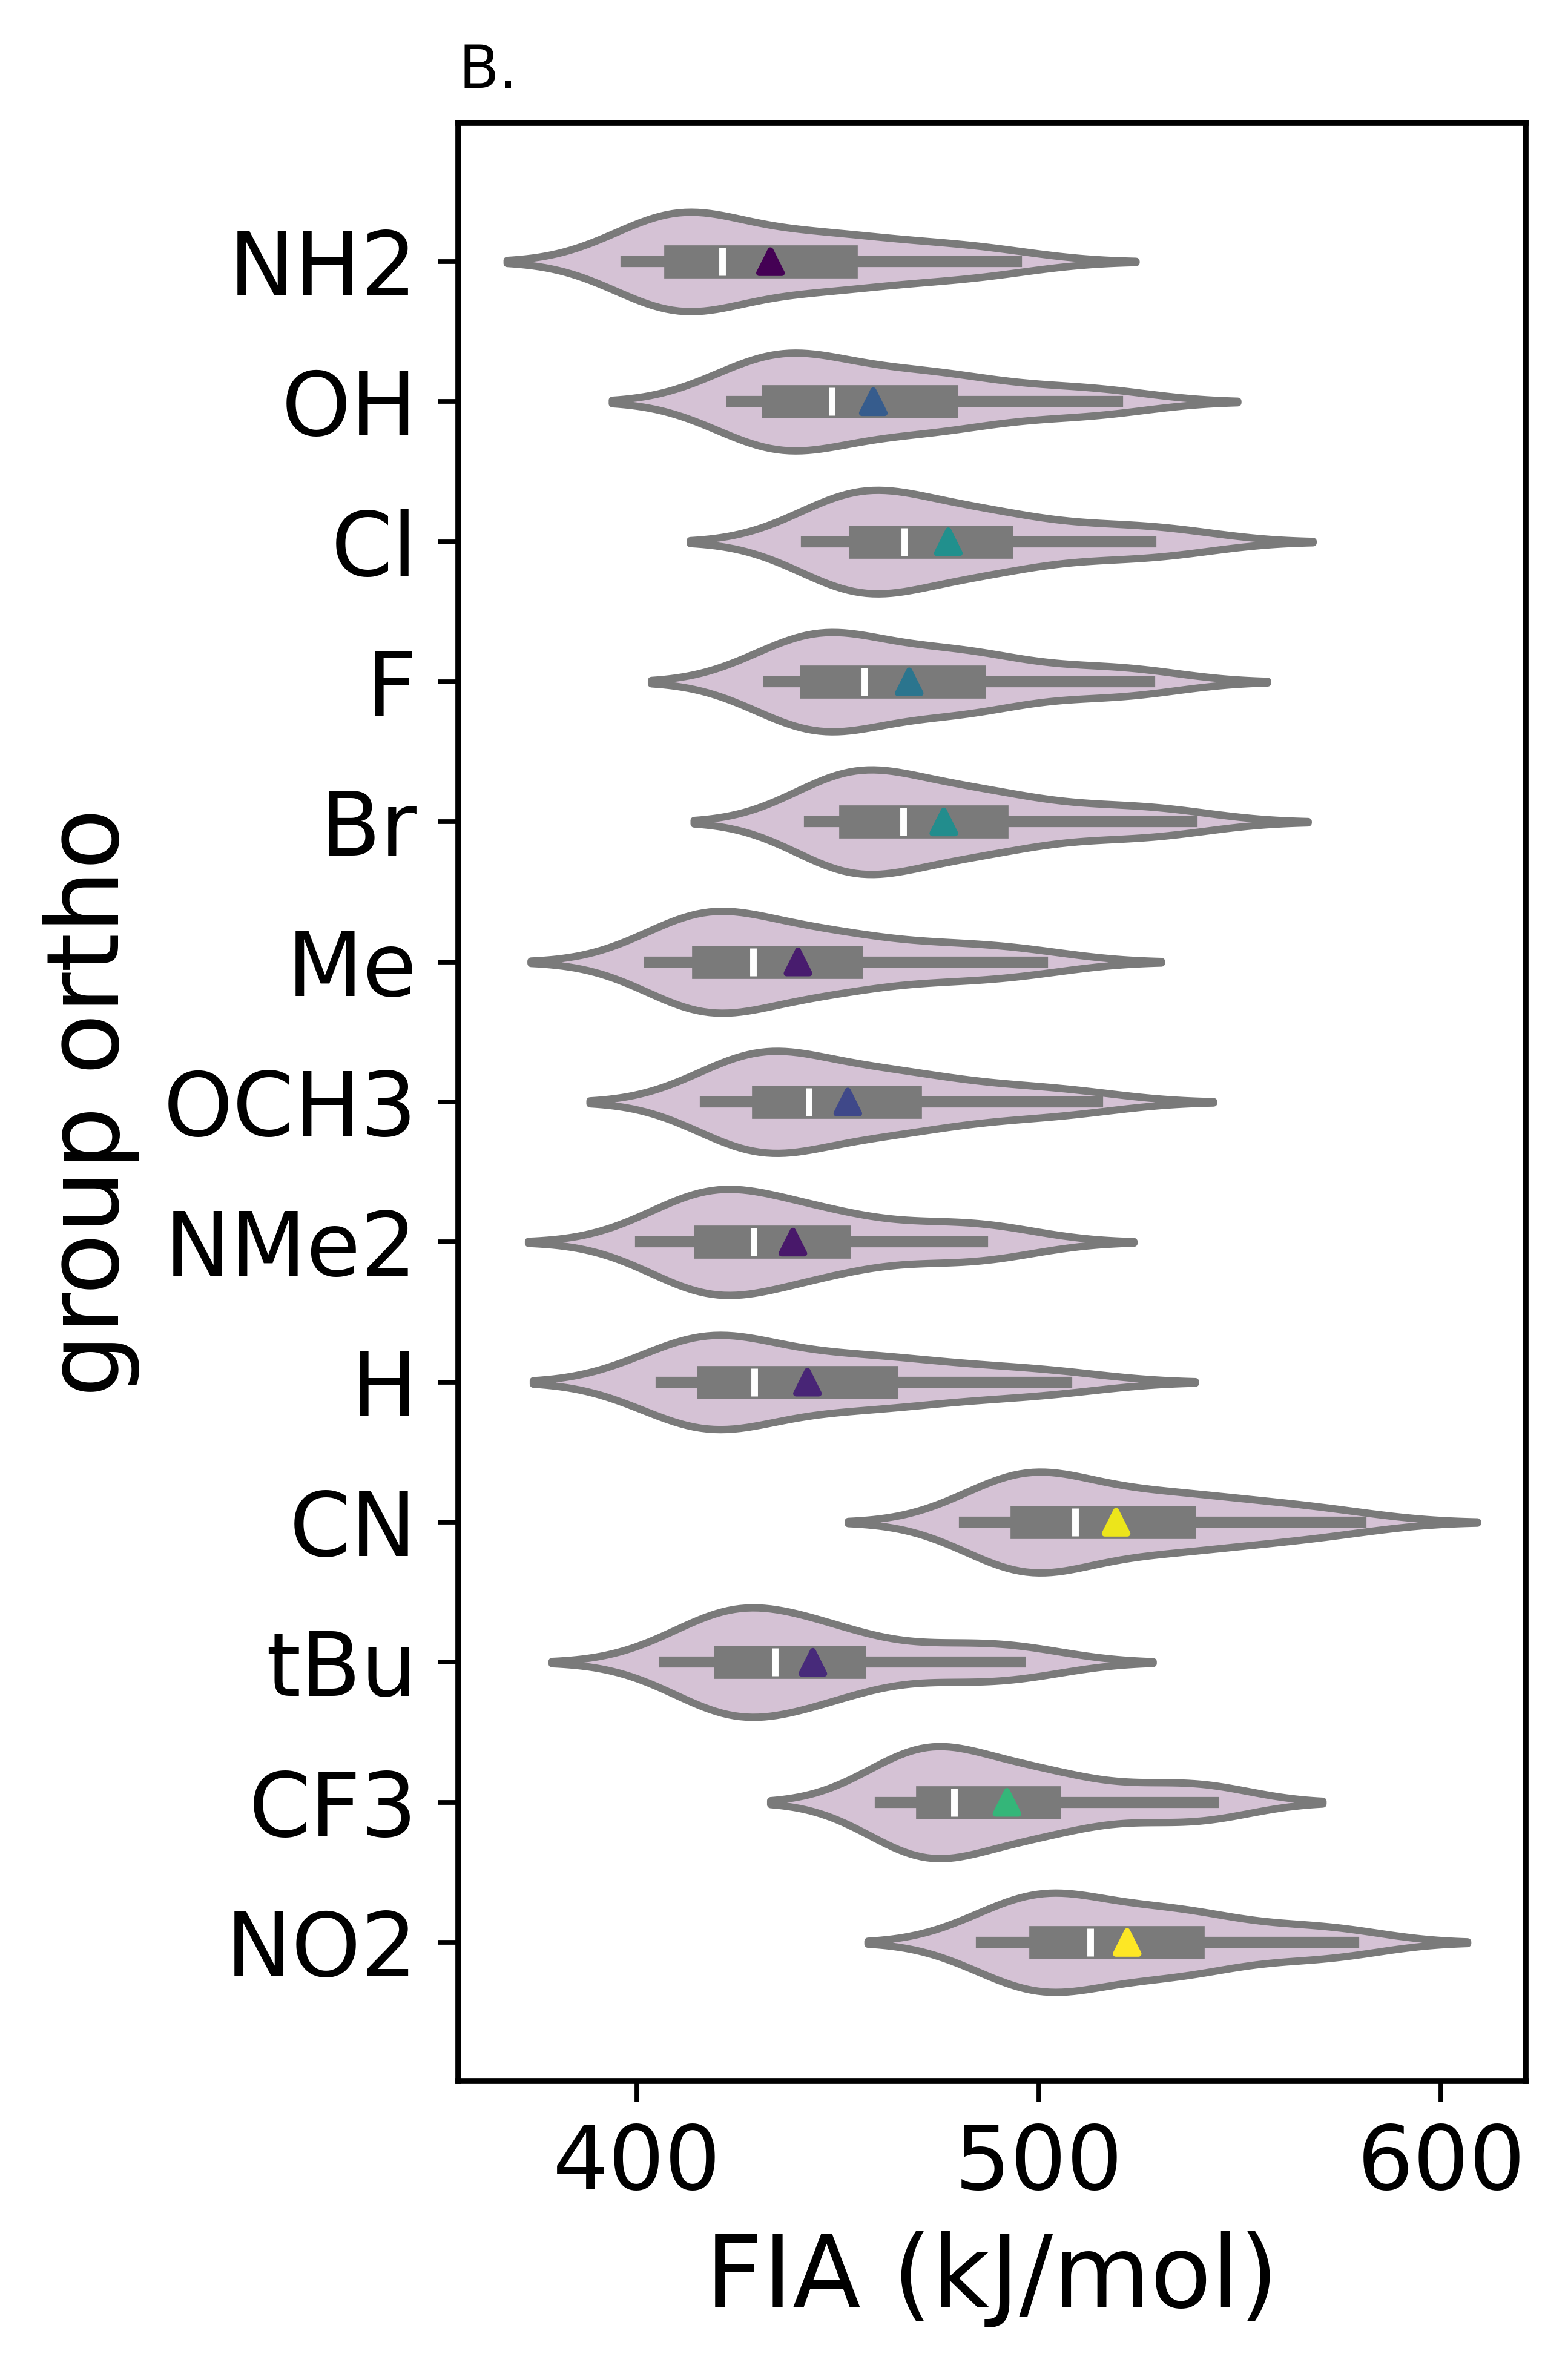

In [84]:
df_para_meso = df[df['group para'].isin(mesomeric_attractive)]


fig, ax = plt.subplots(figsize = (3.25, 6))

mean_FIA = df_para_meso.groupby('group ortho')['FIA'].mean().reset_index()


sns.violinplot(df_para_meso, x = 'FIA', y='group ortho', color = 'thistle' )

plt.scatter(x=mean_FIA['FIA'], y=mean_FIA['group ortho'], c= mean_FIA['FIA'], cmap = 'viridis', label='Mean FIA', zorder=5, s = 15, marker = '^')

plt.xlabel('FIA (kJ/mol)')


plt.title("B.", loc = 'left', size = 10);


#fig.savefig(f'article/figures/violin_plot_group_ortho.svg', facecolor = 'white', format = 'svg', transparent = True, bbox_inches='tight')


In [92]:
mean_FIA = df_para_meso.groupby('group ortho')['FIA'].mean().reset_index().set_index('group ortho')


In [93]:
mean_FIA

,FIA
group ortho,
Br,476.299923
CF3,492.009612
CN,519.150795
Cl,477.422694
F,467.690282
H,442.378195
Me,440.030588
NH2,433.185719
NMe2,438.757038


In [39]:
df_para_meso['group ortho']

SMILES
N#Cc1cc2c(c(N)c1N)OB1Oc3c(cc(C#N)c(N)c3N)N12                                                                  NH2
Nc1c([N+](=O)[O-])cc2c(c1N)OB1Oc3c(cc([N+](=O)[O-])c(N)c3N)N12                                                NH2
N#Cc1cc2c(c(O)c1N)OB1Oc3c(cc(C#N)c(N)c3O)N12                                                                   OH
Nc1c([N+](=O)[O-])cc2c(c1O)OB1Oc3c(cc([N+](=O)[O-])c(N)c3O)N12                                                 OH
N#Cc1cc2c(c(Cl)c1N)OB1Oc3c(cc(C#N)c(N)c3Cl)N12                                                                 Cl
                                                                                                             ... 
CC(C)(C)c1c2c(cc([N+](=O)[O-])c1[N+](=O)[O-])N1B(O2)Oc2c1cc([N+](=O)[O-])c([N+](=O)[O-])c2C(C)(C)C            tBu
N#Cc1cc2c(c(C(F)(F)F)c1[N+](=O)[O-])OB1Oc3c(cc(C#N)c([N+](=O)[O-])c3C(F)(F)F)N12                              CF3
O=[N+]([O-])c1cc2c(c(C(F)(F)F)c1[N+](=O)[O-])OB1Oc3c(cc([N+](=O)[O-])c([N+](=O)[O

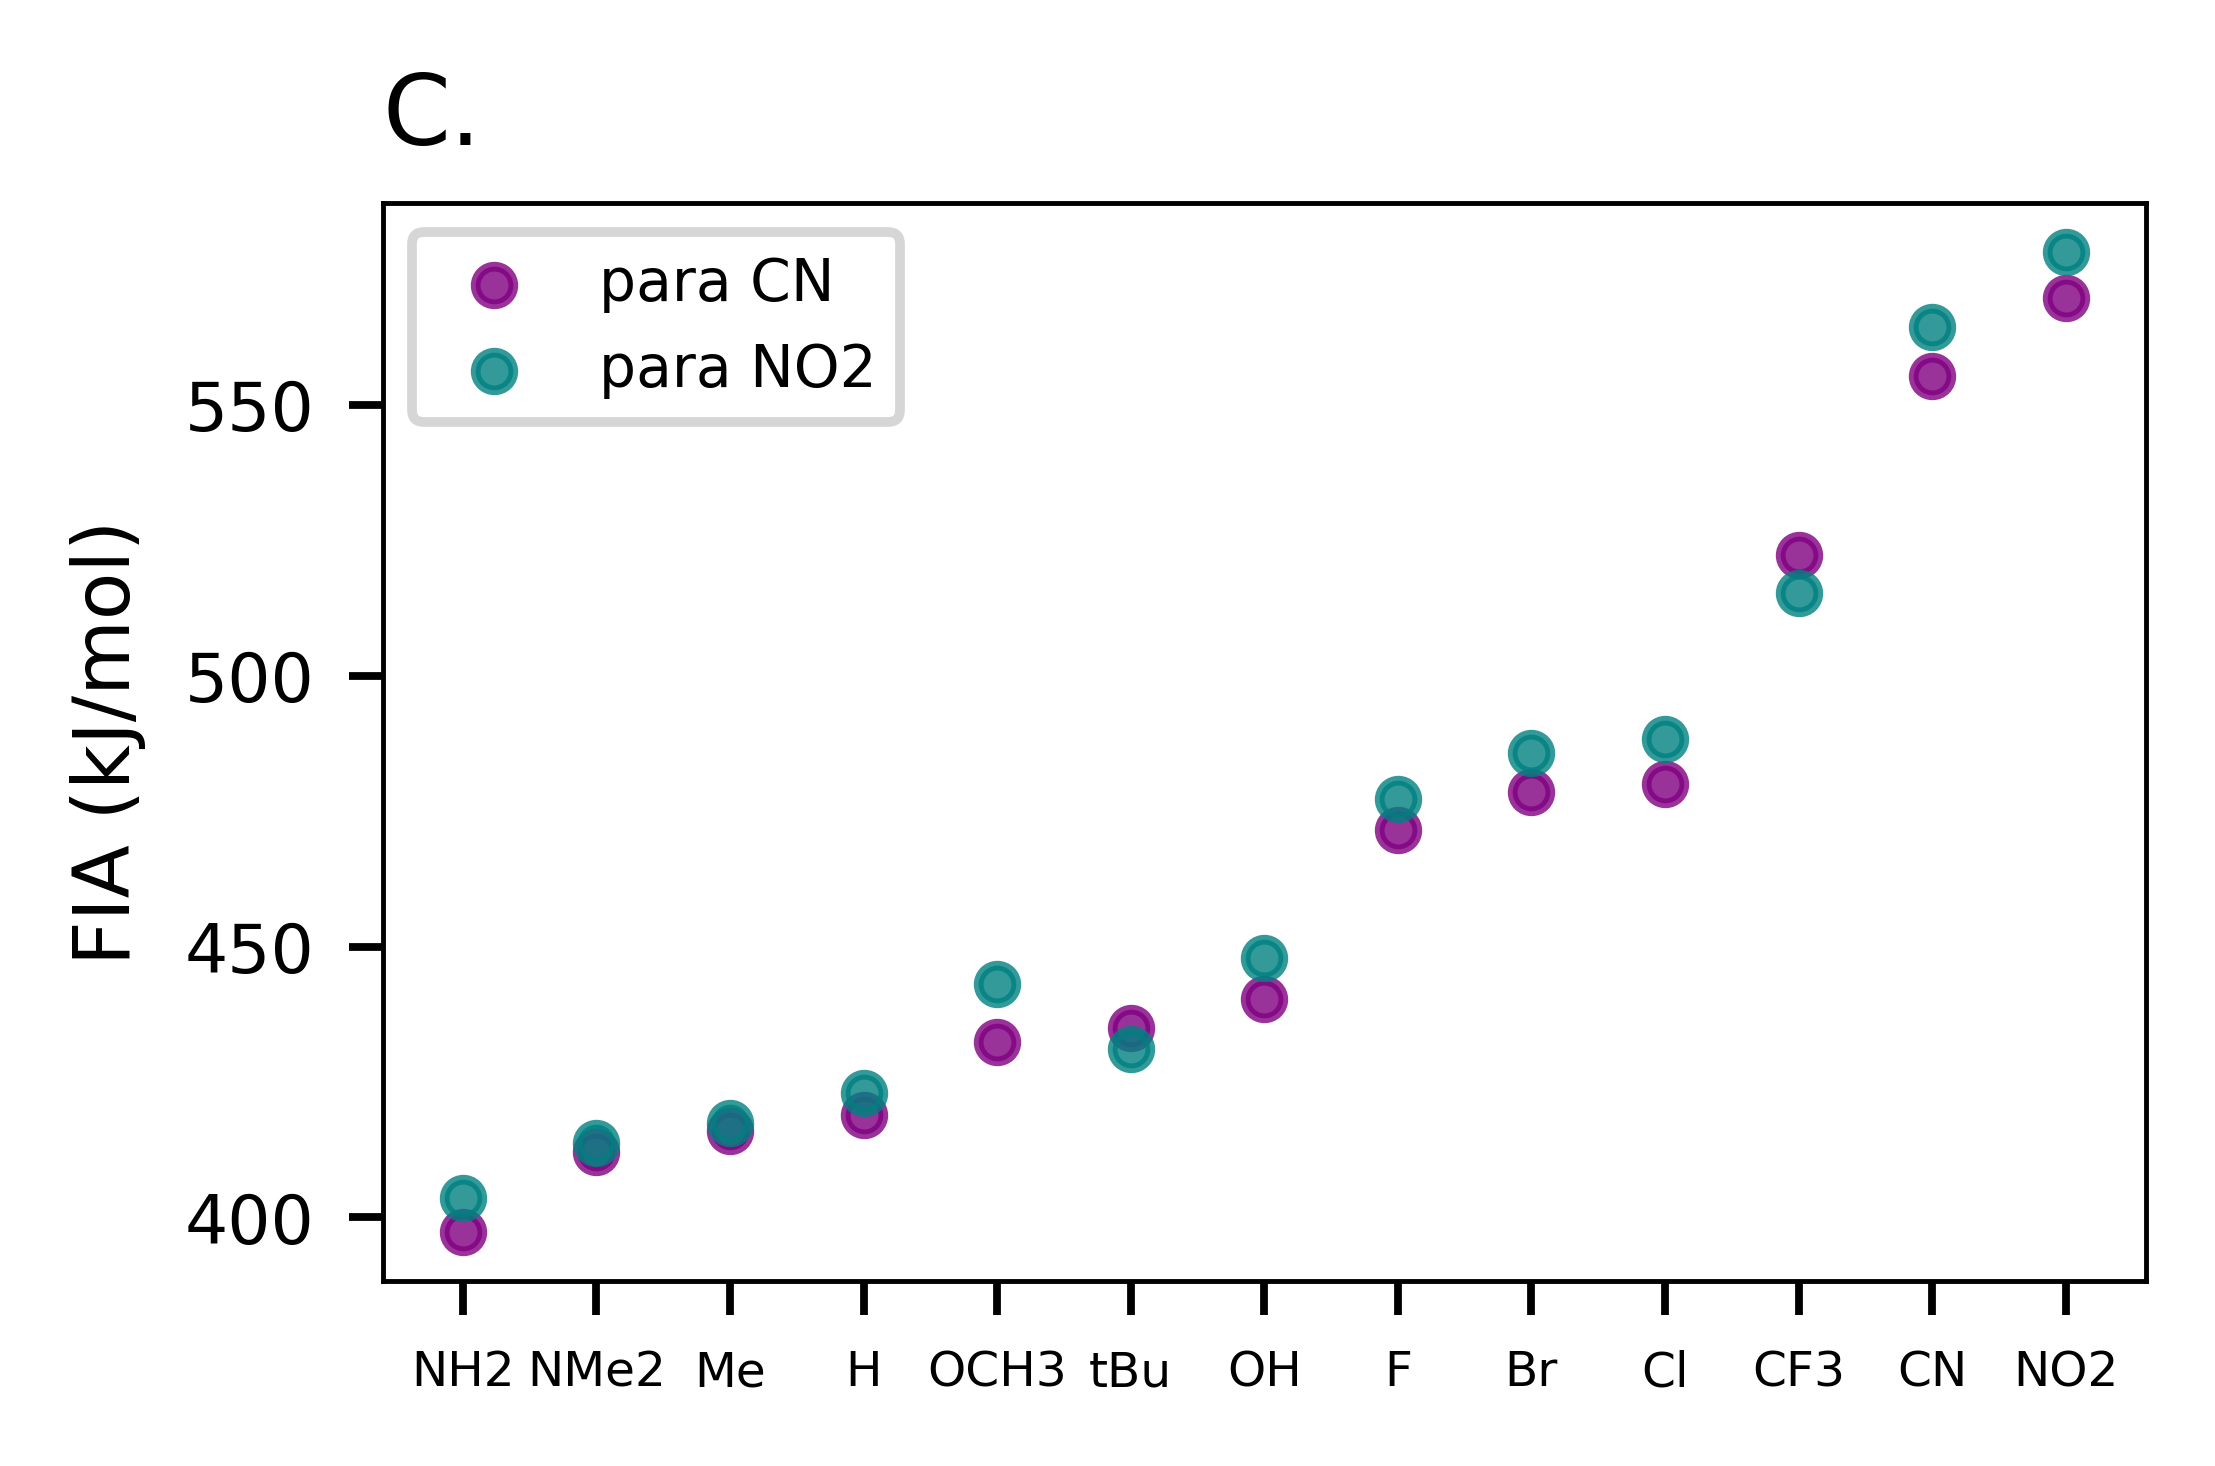

In [43]:
fig, ax = plt.subplots(figsize = (3.25, 2))

df_plot_1 = df[(df['group para'] == 'CN') & (df['group ortho']== df['group meta'])].sort_values('FIA')
ax.scatter(df_plot_1['group ortho'],df_plot_1.FIA, label = 'para CN', s =15, c = 'purple', alpha = 0.8)


df_plot_2 = df[(df['group para'] == 'NO2') & (df['group ortho']== df['group meta'])]
ax.scatter(df_plot_2['group ortho'],df_plot_2.FIA, label = 'para NO2', s = 15, c = 'teal', alpha = 0.8)

plt.xticks(fontsize = 5)
plt.ylabel('FIA (kJ/mol)')
plt.legend()

plt.title("C.", loc = 'left', size = 10);


fig.savefig(f'article/figures/group_ortho=group_para.svg', facecolor = 'white', format = 'svg', transparent = True, bbox_inches='tight')

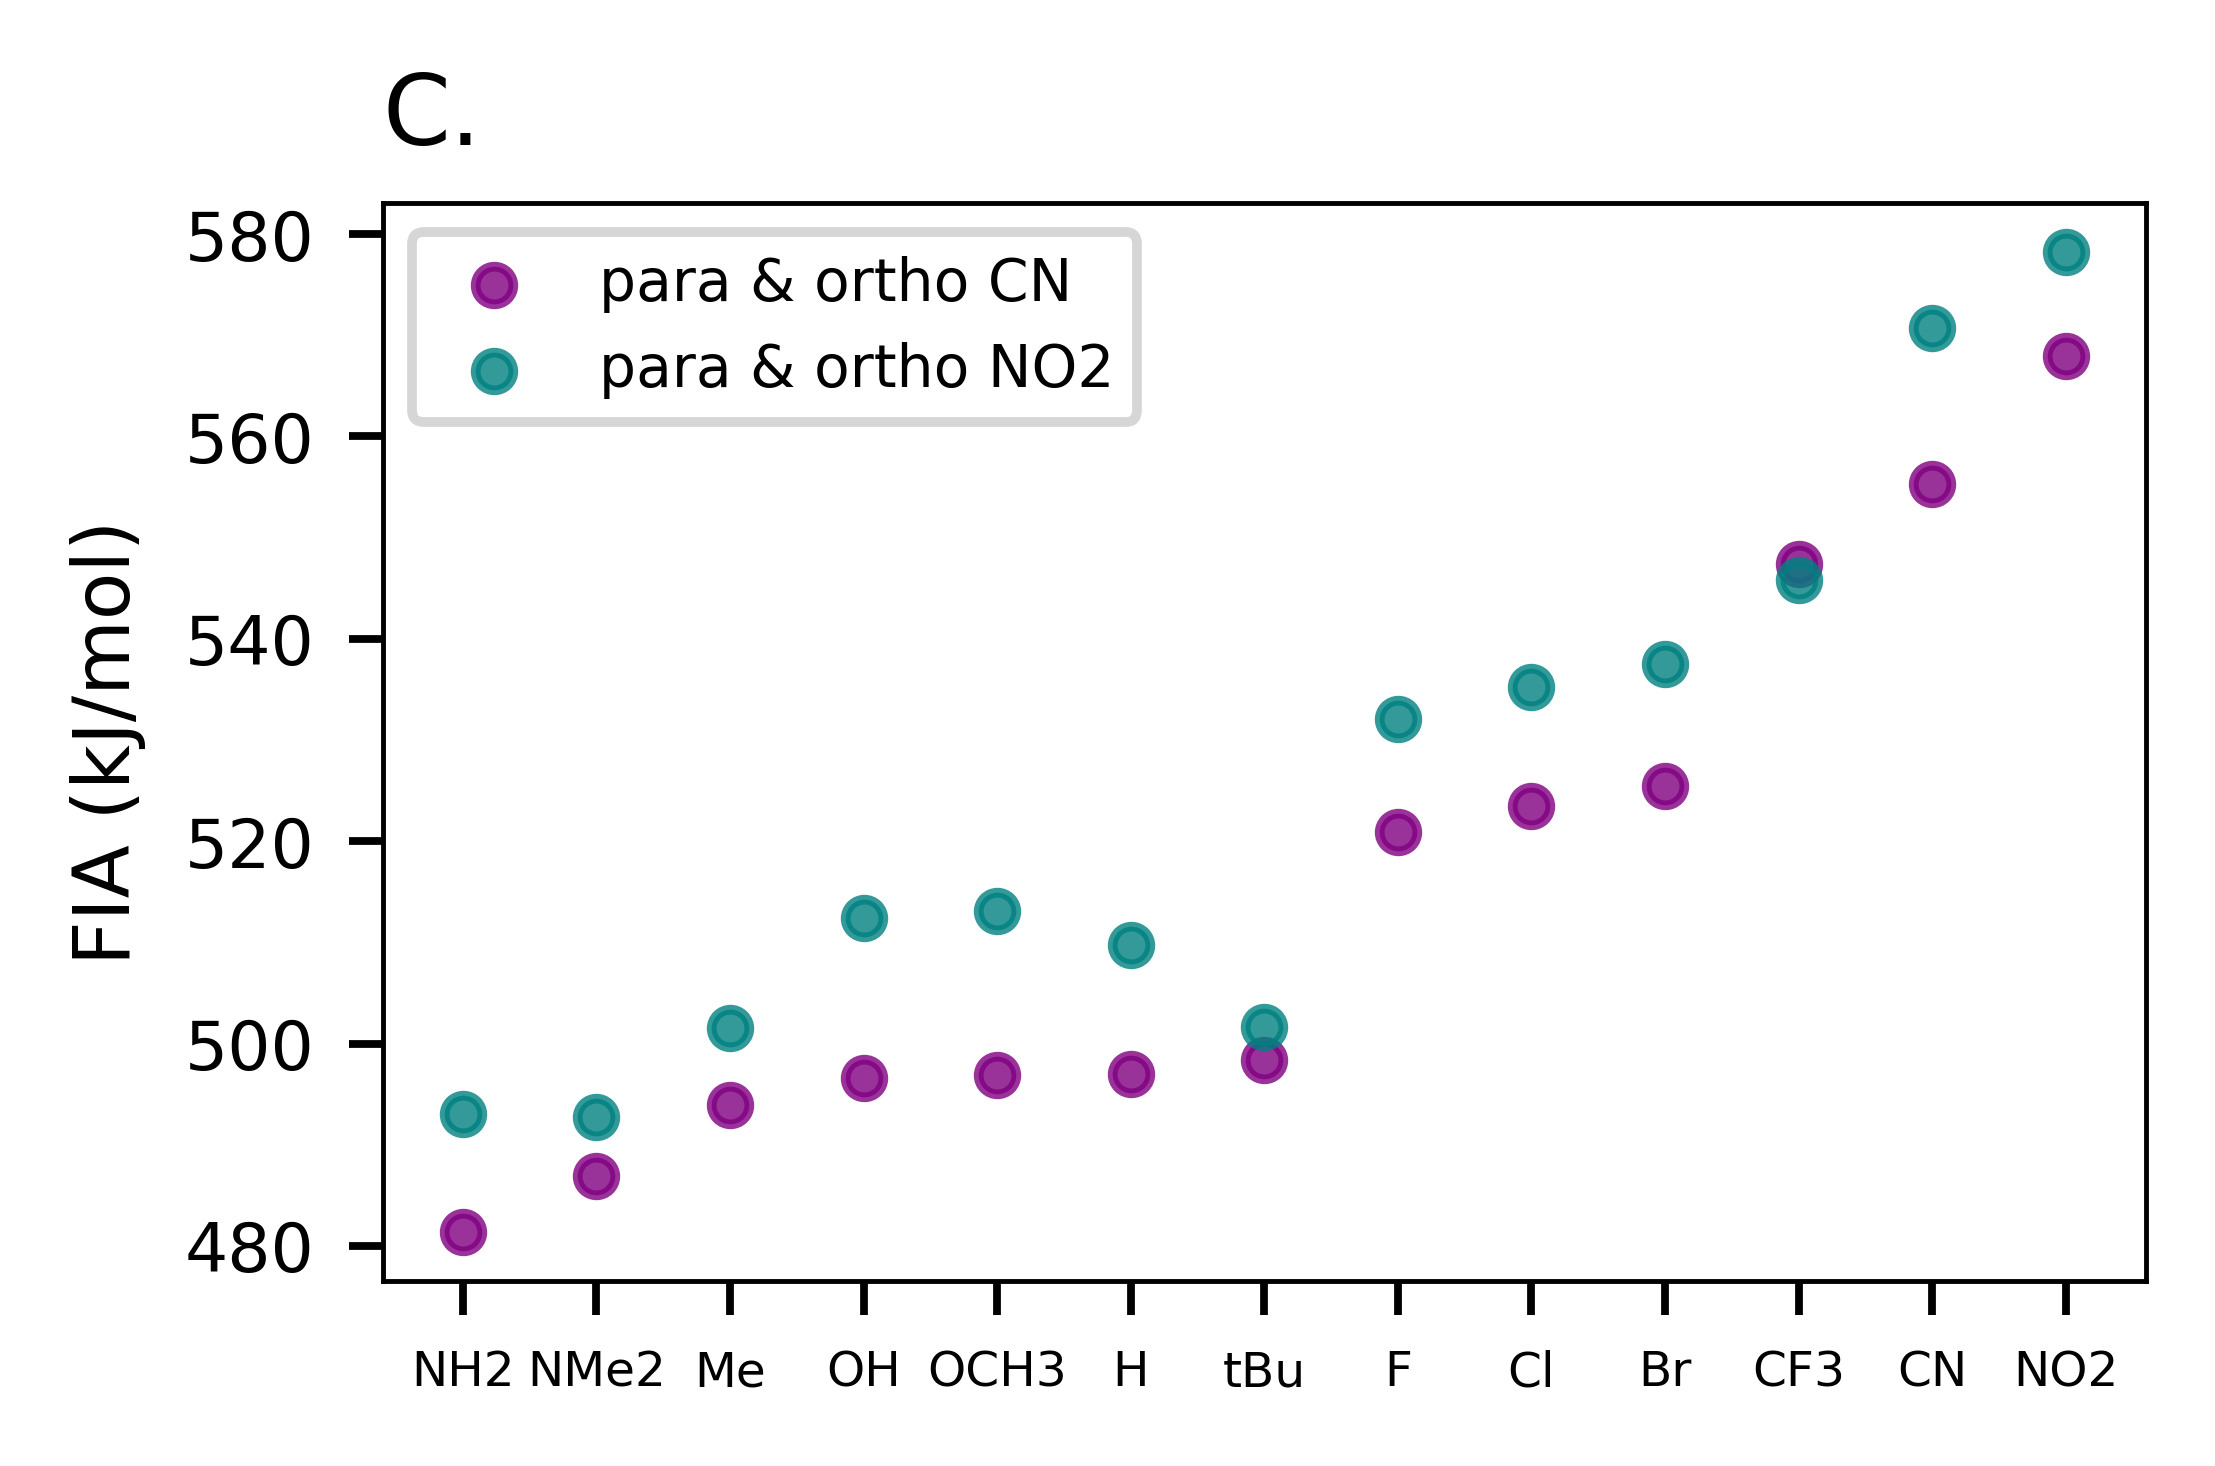

In [17]:
fig, ax = plt.subplots(figsize = (3.25, 2))

df_plot_1 = df[(df['group para'] == 'CN') & (df['group ']== 'CN')].sort_values('FIA')
ax.scatter(df_plot_1['group meta'],df_plot_1.FIA, label = 'para & ortho CN', s =15, c = 'purple', alpha = 0.8)


df_plot_2 = df[(df['group para'] == 'NO2') & (df['group ortho']== 'NO2')]
ax.scatter(df_plot_2['group meta'],df_plot_2.FIA, label = 'para & ortho NO2', s = 15, c = 'teal', alpha = 0.8)

plt.xticks(fontsize = 5)
plt.ylabel('FIA (kJ/mol)')
plt.legend()

plt.title("C.", loc = 'left', size = 10);


#fig.savefig(f'article/figures/group_ortho=group_para.svg', facecolor = 'white', format = 'svg', transparent = True, bbox_inches='tight')

 ## Poster

In [14]:
rc('font', family='sans-serif', size = 15)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 15)
rc('legend', fontsize=15)
rc('lines', linewidth = 3)
rc('axes', linewidth = 1)
rc('axes', labelsize = 17)
rc('legend', handlelength = 2)

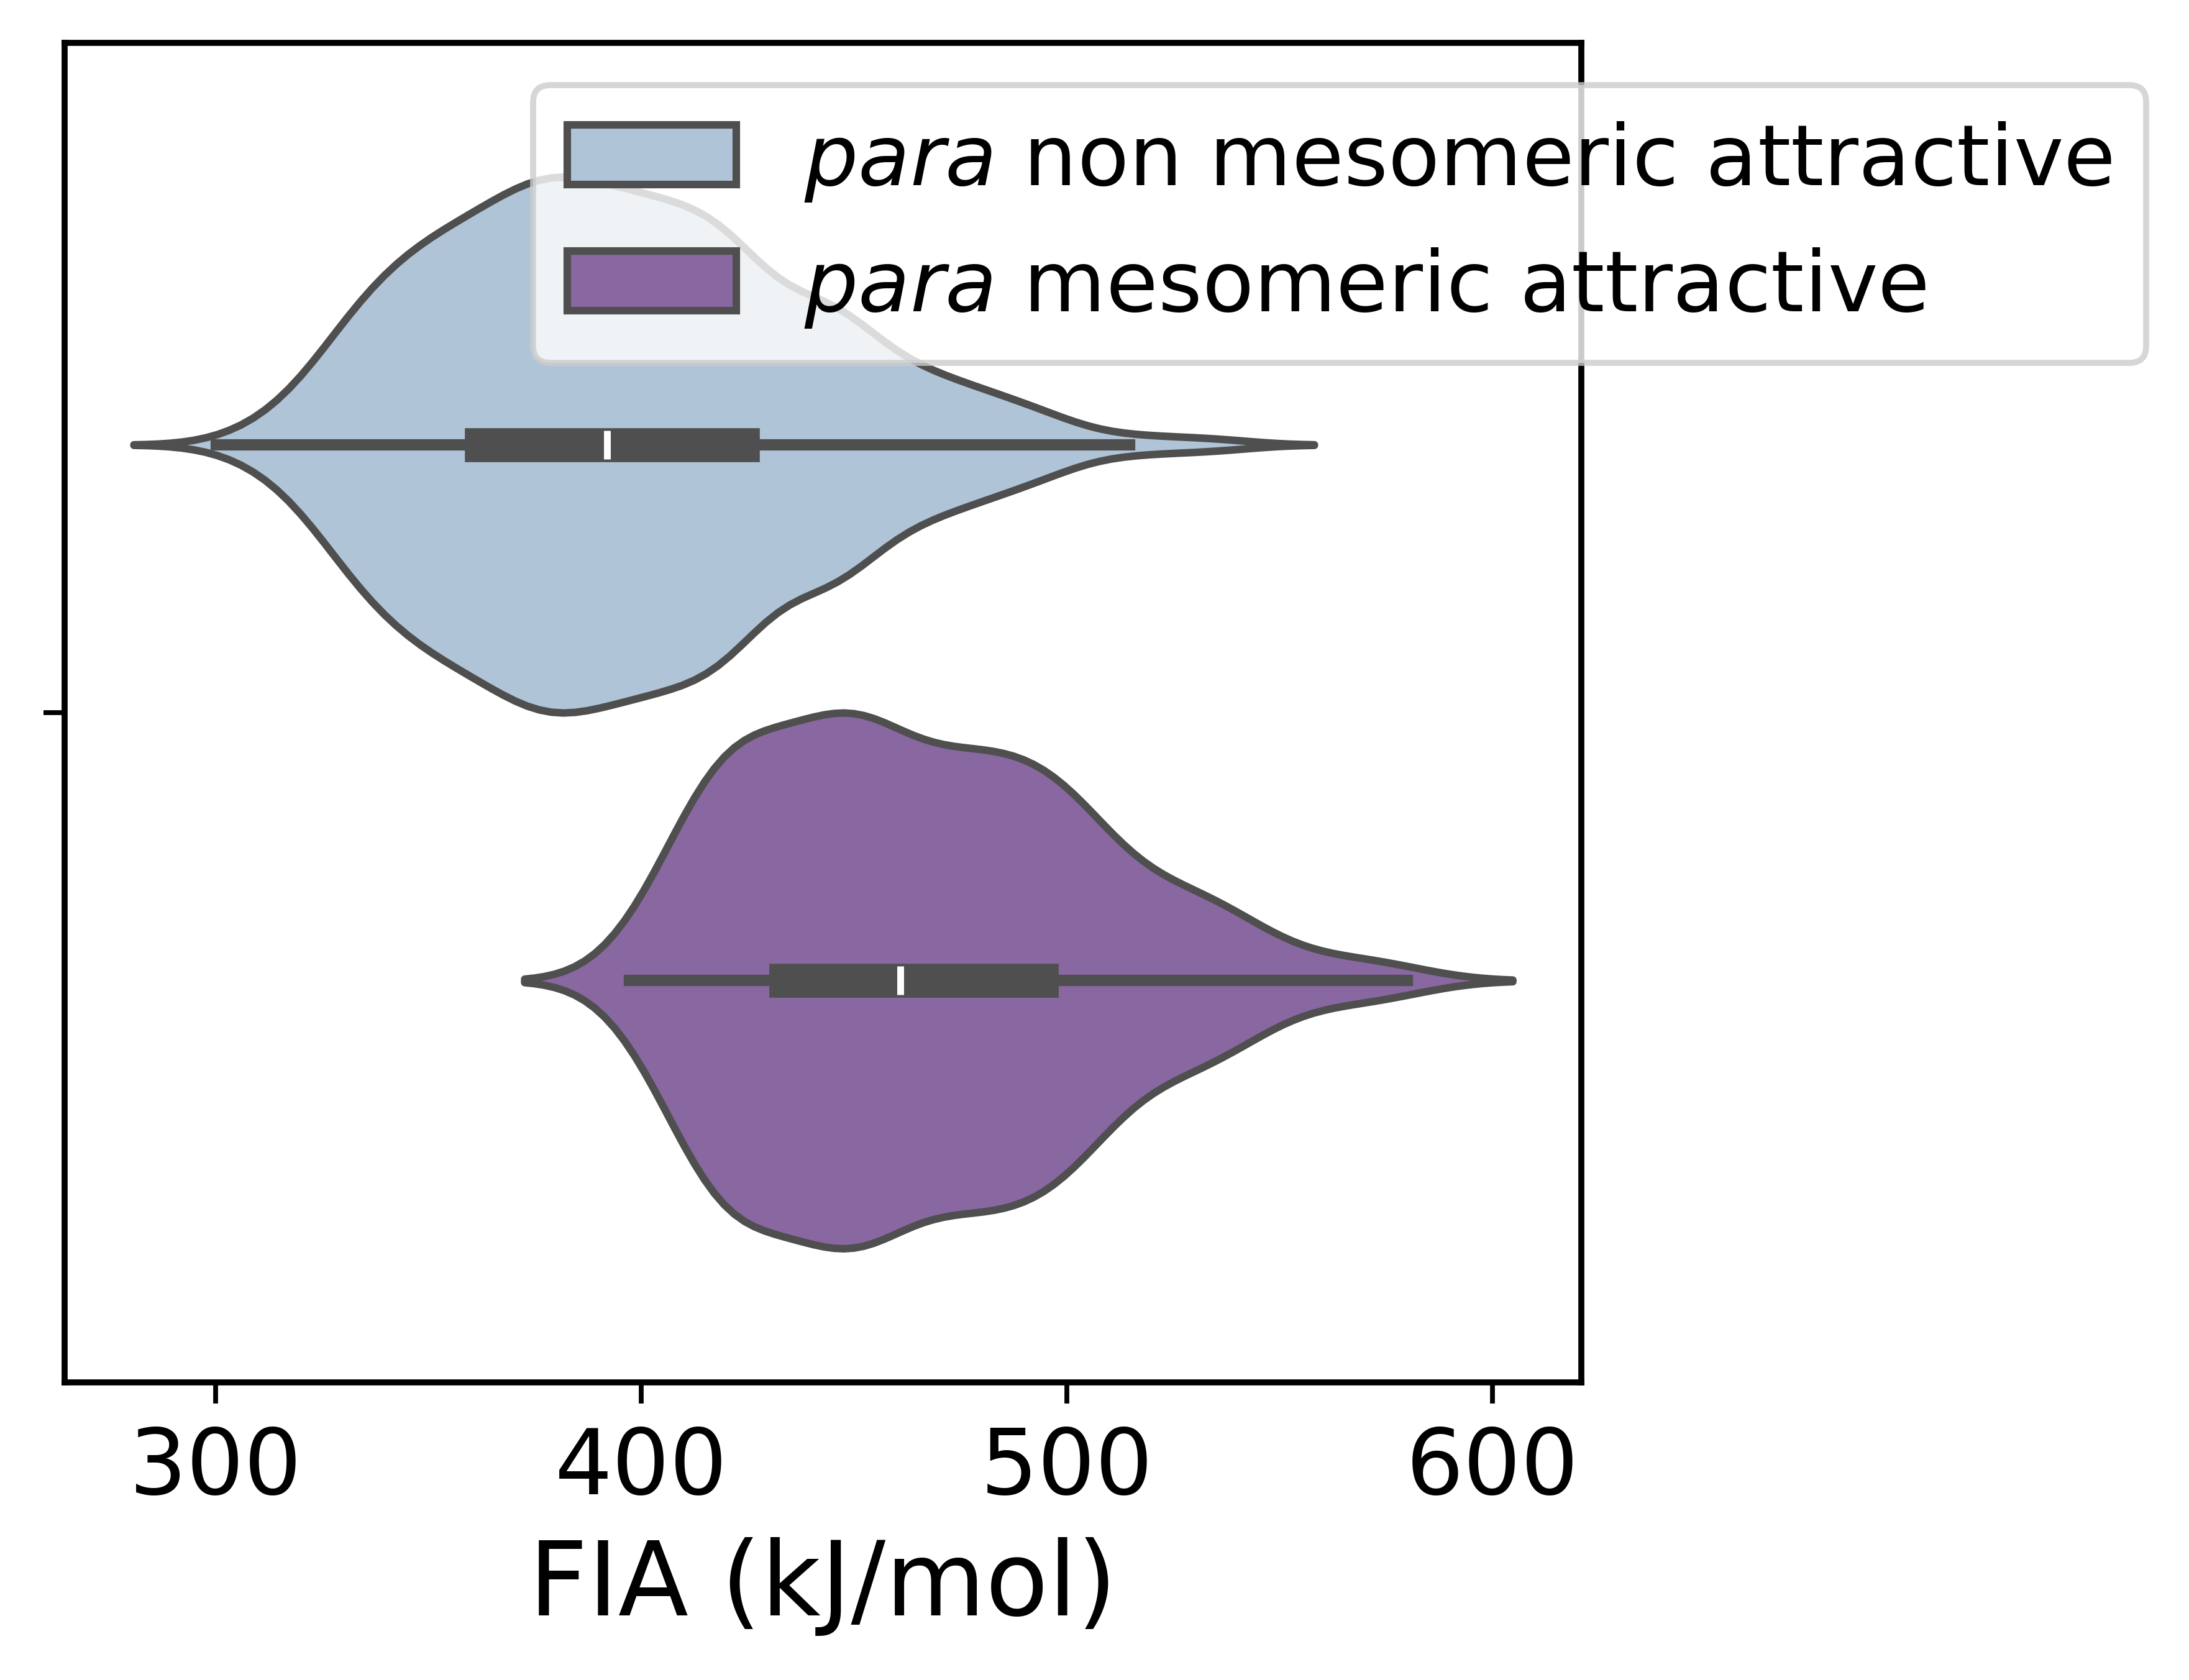

In [15]:
fig, ax = plt.subplots(figsize = (4.5, 4))

sns.violinplot(df_plot, x = 'FIA', hue = 'nature of para group', palette = 'BuPu')

#plt.legend(fontsize = 6)

plt.xlabel('FIA (kJ/mol)')

plt.legend(loc='best', bbox_to_anchor=(0.9,0.5, 0.5, 0.5), fontsize = 14)


#plt.title("A.", loc = 'left', size = 10)
;

fig.savefig('figures/poster/split_para_group.svg', format = 'svg', transparent= True, bbox_inches='tight')


''

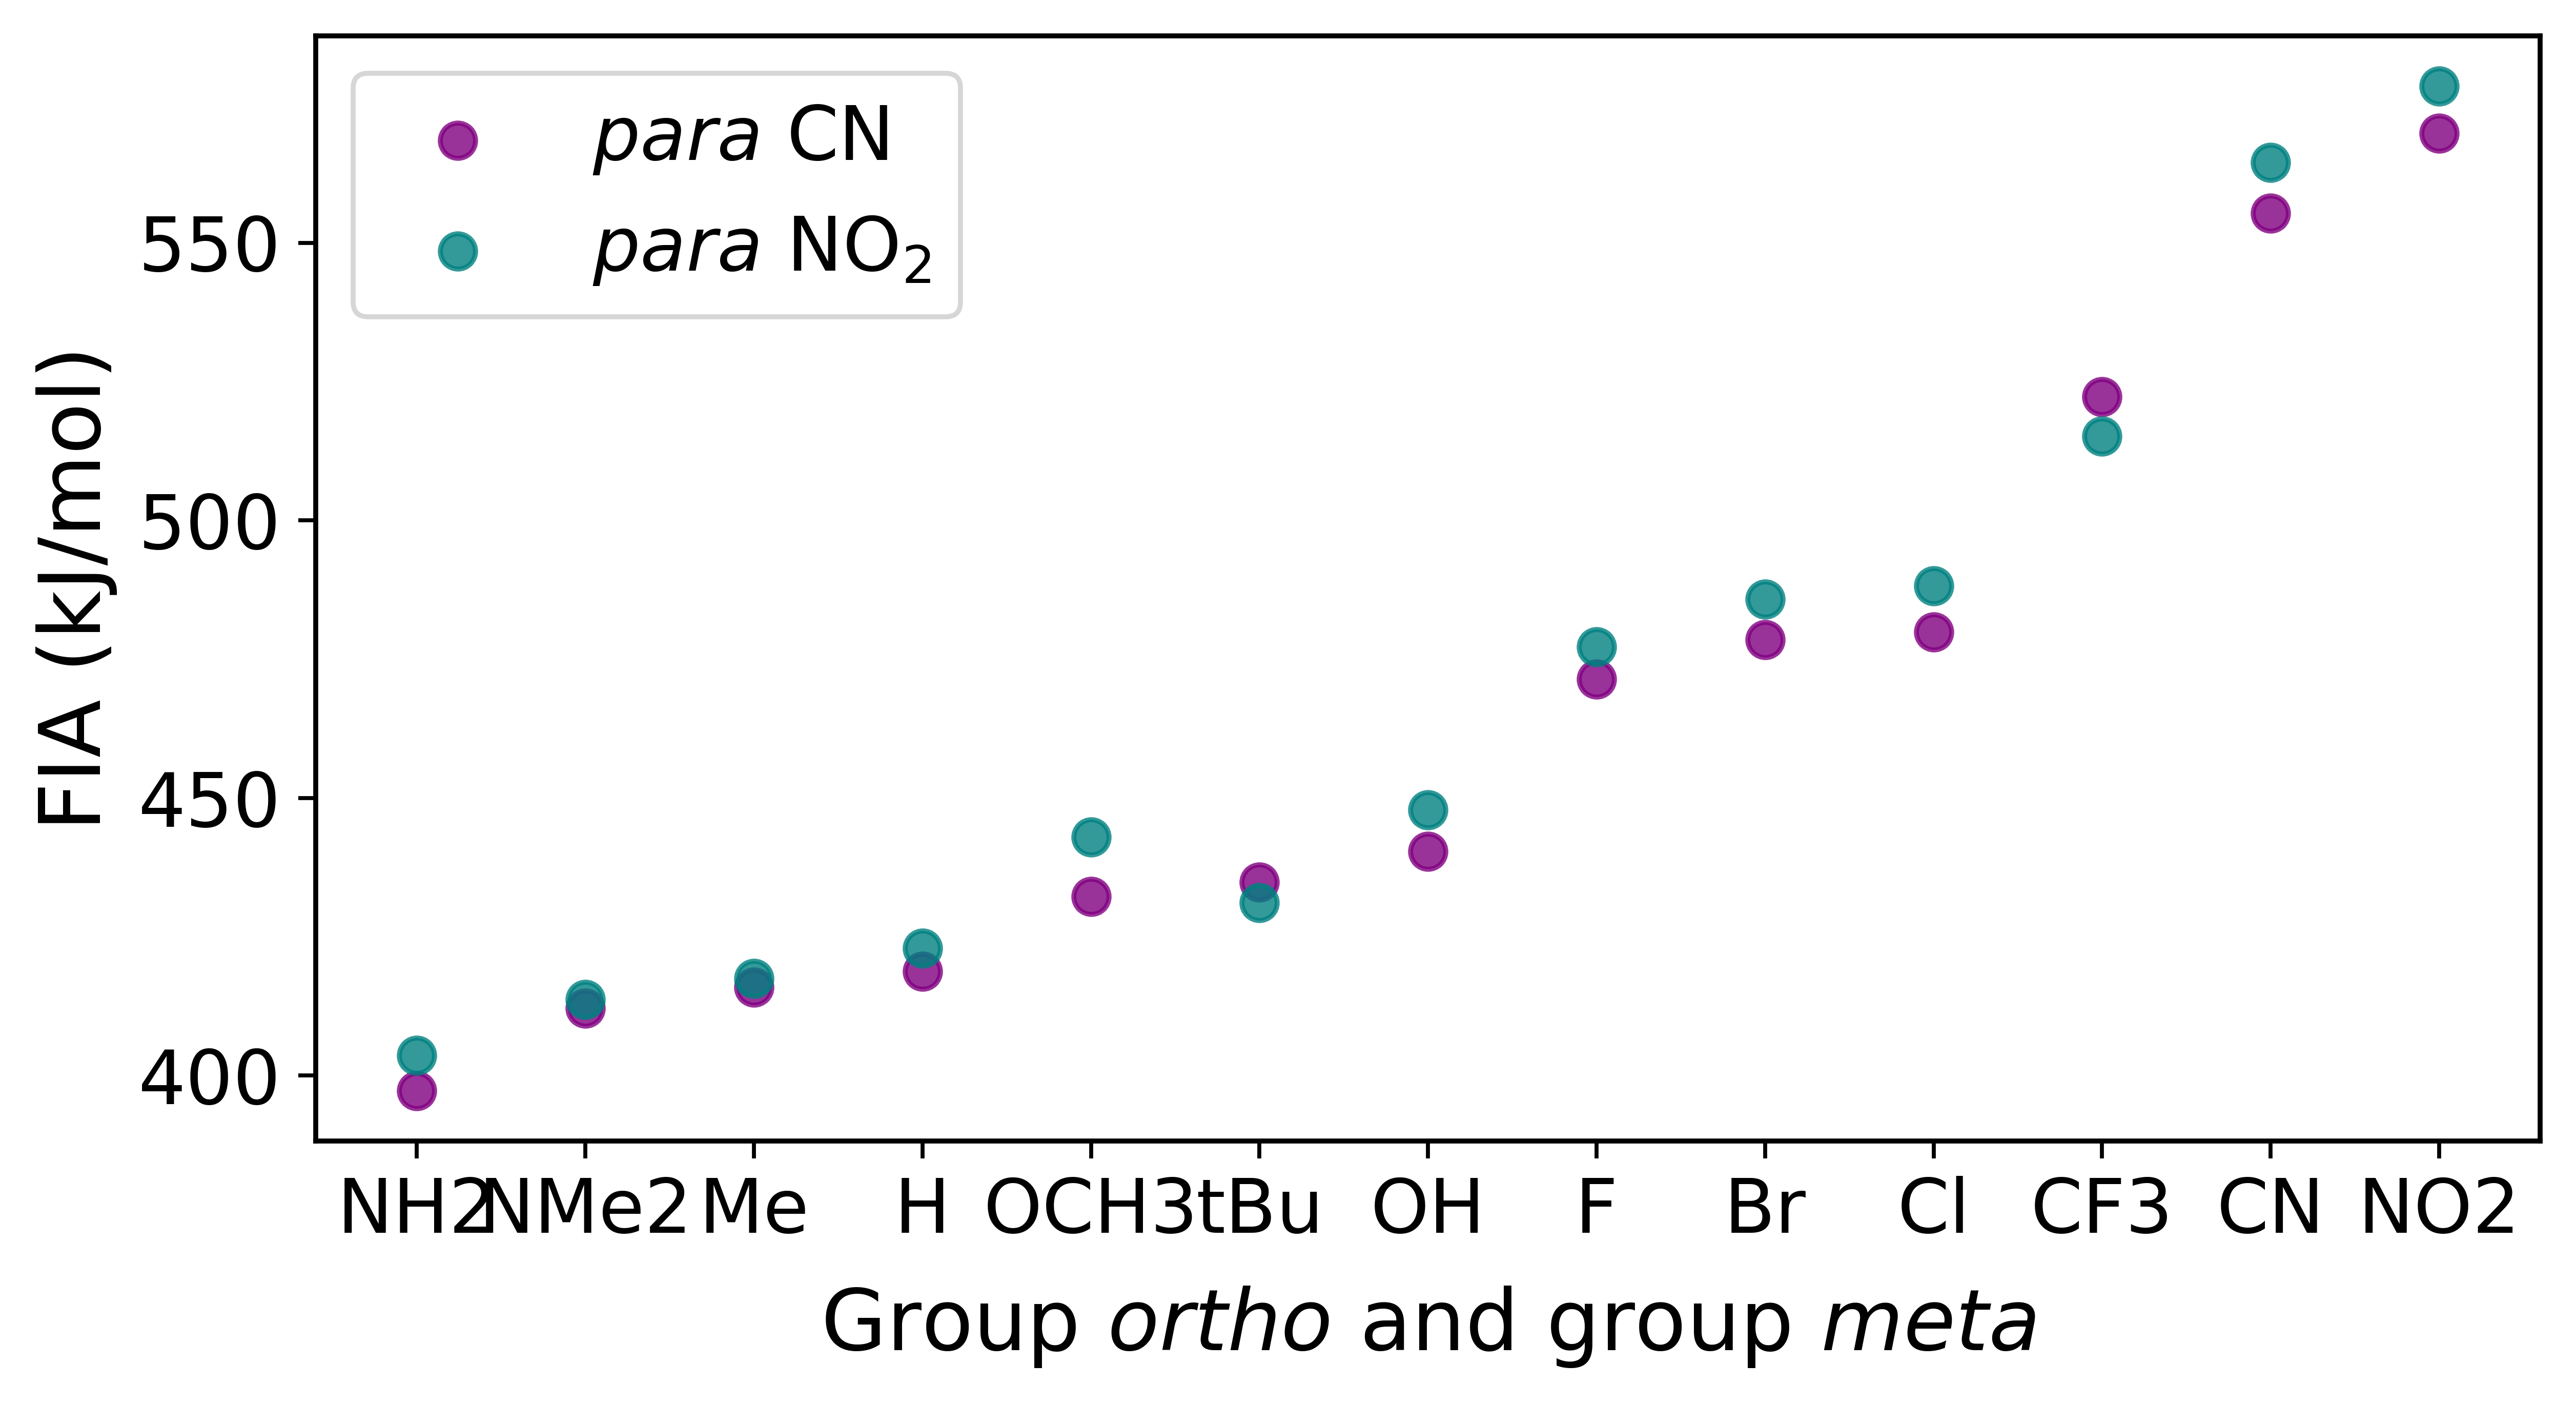

In [37]:
fig, ax = plt.subplots(figsize = (8, 4))

df_plot_1 = df[(df['group para'] == 'CN') & (df['group ortho']== df['group meta'])].sort_values('FIA')
ax.scatter(df_plot_1['group ortho'],df_plot_1.FIA, label = '$para$ CN', s =50, c = 'purple', alpha = 0.8)


df_plot_2 = df[(df['group para'] == 'NO2') & (df['group ortho']== df['group meta'])]
ax.scatter(df_plot_2['group ortho'],df_plot_2.FIA, label = '$para$ NO$_2$', s = 50, c = 'teal', alpha = 0.8)

ax.set_xticks(ax.get_xticks(),fontsize = 12)
#ax.set_yticks(ax.get_yticks(), fontsize = 11)
ax.set_ylabel('FIA (kJ/mol)')
ax.set_xlabel("Group $ortho$ and group $meta$")
#ax.tick_params(axis='both', pad=30)

ax.xaxis.set_label_coords(0.5, -0.13)

plt.legend()

;



#fig.savefig(f'figures/poster/group_ortho=group_meta.png', format = 'png', transparent = True,  bbox_inches='tight')

In [48]:
ticks = ['NH$_2$', 'NMe$_2$', 'Me', 'H', 'OCH$_3$', '$t$Bu', 'OH', 'F', 'Br', 'Cl', 'CF$_3$', 'CN', 'NO$_2$']

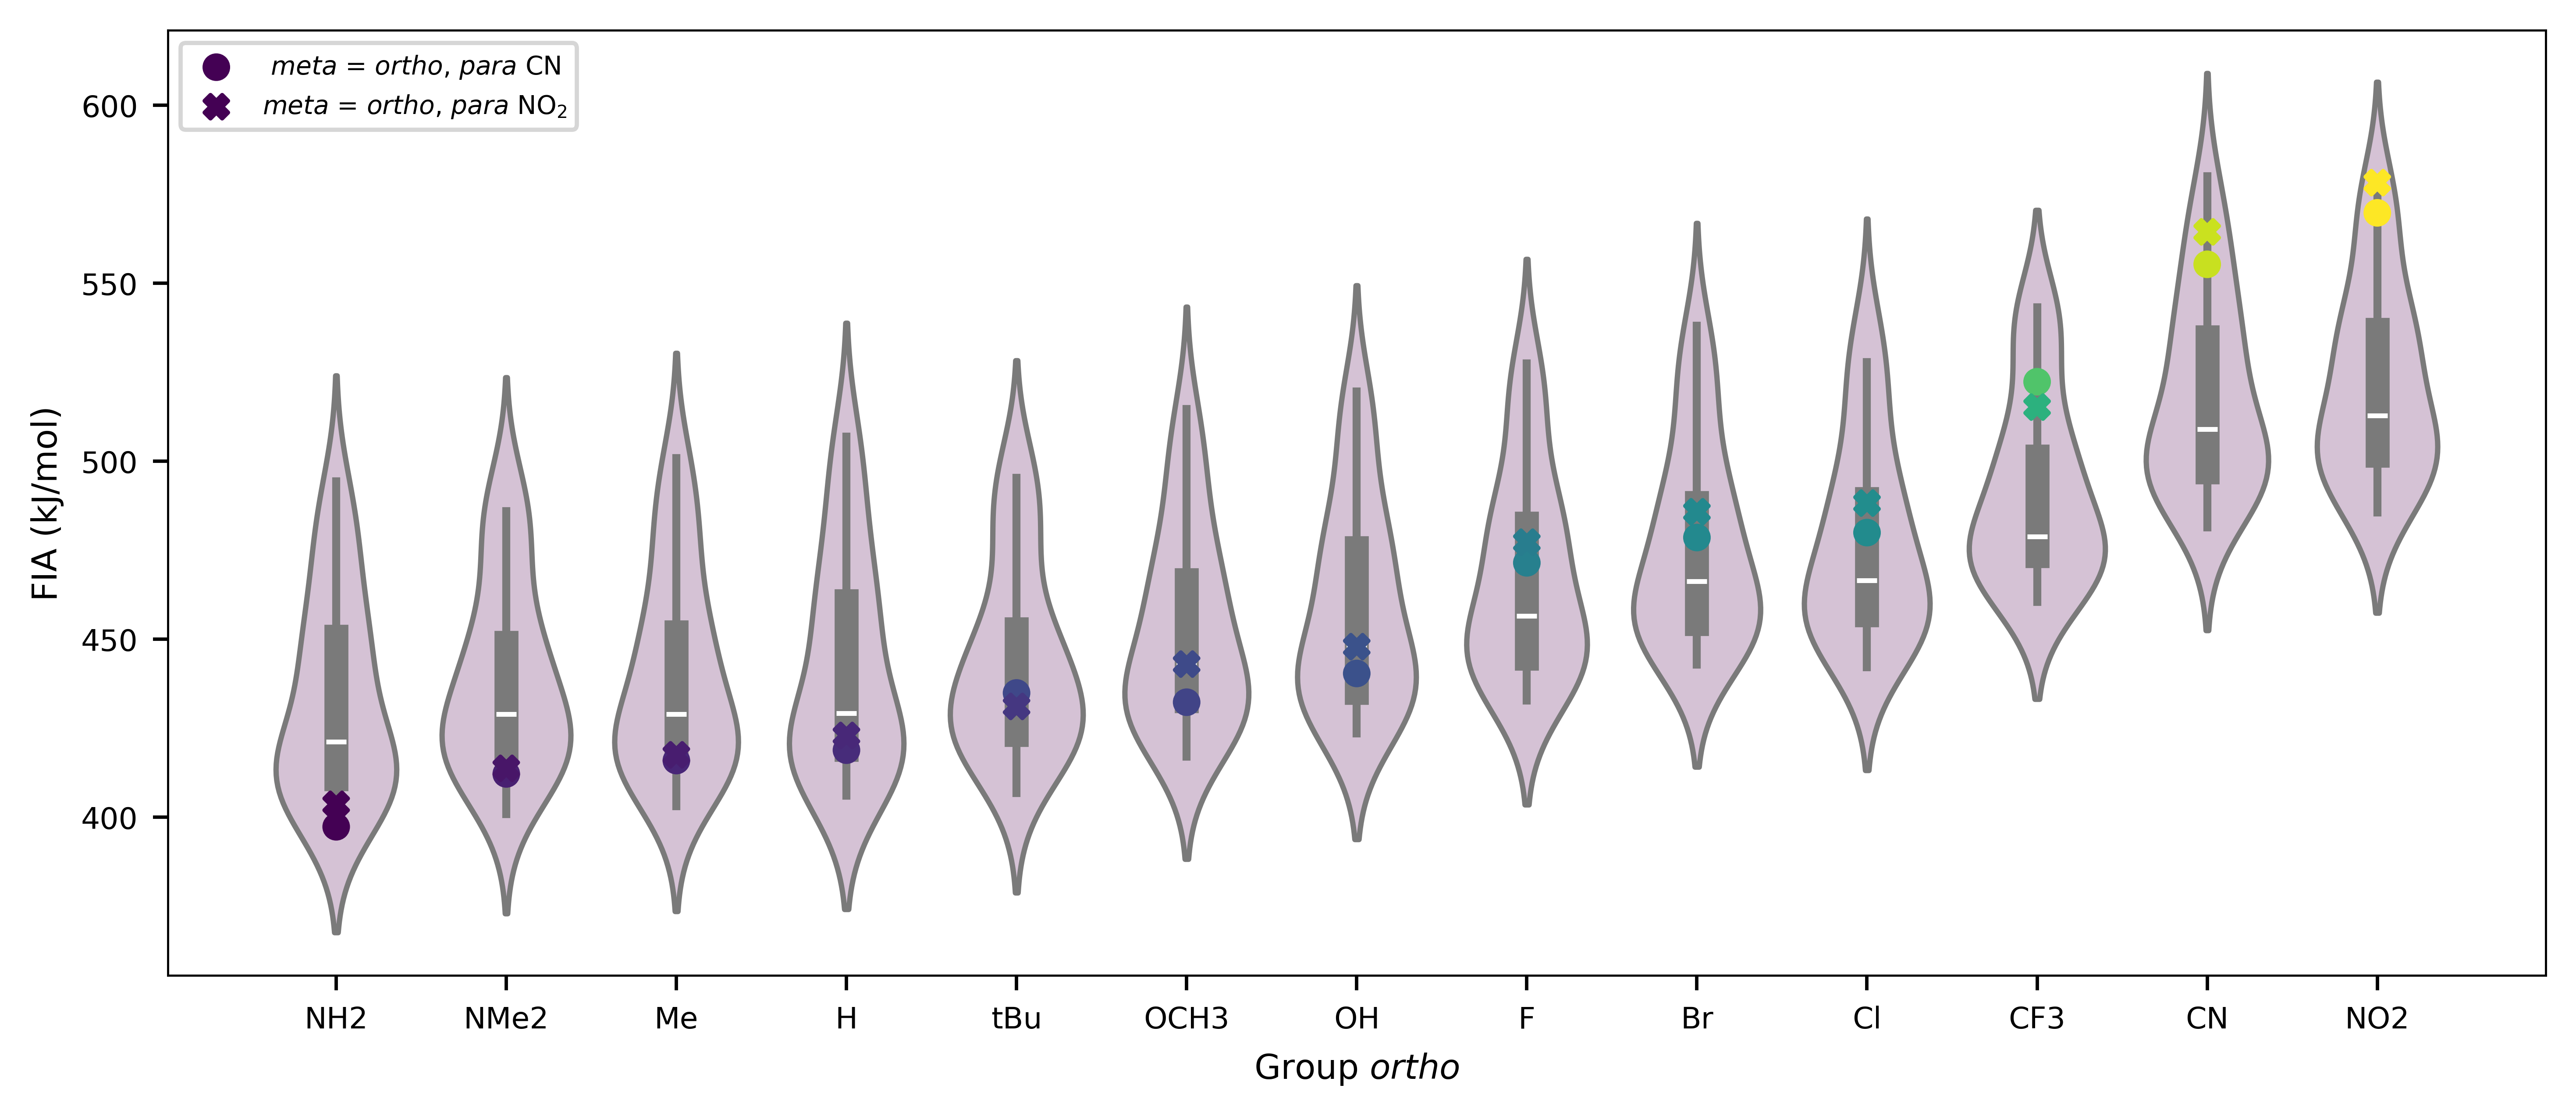

In [14]:

fig, ax = plt.subplots(figsize = (10, 4))

df_para_meso = df[df['group para'].isin(mesomeric_attractive)]




mean_FIA = df_para_meso.groupby('group ortho')['FIA'].mean().reset_index()
order_group = mean_FIA.sort_values('FIA')['group ortho'].to_list()

sns.violinplot(df_para_meso, y = 'FIA', x ='group ortho', order = order_group, color = 'thistle' )

df_plot_1 = df[(df['group para'] == 'CN') & (df['group ortho']== df['group meta'])]
ax.scatter(df_plot_1['group ortho'],df_plot_1.FIA, label = ' $meta$ = $ortho$, $para$ CN', c = df_plot_1.FIA, cmap = 'viridis', zorder=5, s = 30)

df_plot_2 = df[(df['group para'] == 'NO2') & (df['group ortho']== df['group meta'])] 
ax.scatter(df_plot_2['group ortho'],df_plot_2.FIA, label = '$meta$ = $ortho$, $para$ NO$_2$',c=df_plot_2.FIA, cmap = 'viridis', zorder=5, s = 30, marker = 'X')

#plt.scatter(y=mean_FIA['FIA'], x=mean_FIA['group ortho'], c= mean_FIA['FIA'], cmap = 'viridis', label='Mean FIA', zorder=5, s = 30, marker = '^')

ticks = ['NH$_2$', 'NMe$_2$', 'Me', 'H', '$t$Bu', 'OCH$_3$',  'OH', 'F', 'Br', 'Cl', 'CF$_3$', 'CN', 'NO$_2$']
ax.set_xticks(ax.get_xticks(), label = ticks, fontsize = 13)
ax.set_ylabel('FIA (kJ/mol)')
ax.set_xlabel("Group $ortho$")

plt.legend(loc = 'upper left')

#fig.savefig(f'figures/poster/group_ortho_distributions_para_meta.svg', format = 'svg', transparent = True,  bbox_inches='tight')


In [33]:
df_plot_1

,FIA,group ortho,group meta,group para,nature of para group
SMILES,,,,,
N#Cc1cc2c(c(N)c1N)OB1Oc3c(cc(C#N)c(N)c3N)N12,397.299722,NH2,NH2,CN,mesomeric attractive
N#Cc1cc2c(c(O)c1O)OB1Oc3c(cc(C#N)c(O)c3O)N12,440.373823,OH,OH,CN,mesomeric attractive
N#Cc1cc2c(c(Cl)c1Cl)OB1Oc3c(cc(C#N)c(Cl)c3Cl)N12,479.936348,Cl,Cl,CN,mesomeric attractive
N#Cc1cc2c(c(F)c1F)OB1Oc3c(cc(C#N)c(F)c3F)N12,471.447815,F,F,CN,mesomeric attractive
N#Cc1cc2c(c(Br)c1Br)OB1Oc3c(cc(C#N)c(Br)c3Br)N12,478.555854,Br,Br,CN,mesomeric attractive
Cc1c(C#N)cc2c(c1C)OB1Oc3c(cc(C#N)c(C)c3C)N12,415.903022,Me,Me,CN,mesomeric attractive
COc1c(C#N)cc2c(c1OC)OB1Oc3c(cc(C#N)c(OC)c3OC)N12,432.289654,OCH3,OCH3,CN,mesomeric attractive
CN(C)c1c(C#N)cc2c(c1N(C)C)OB1Oc3c(cc(C#N)c(N(C)C)c3N(C)C)N12,412.151868,NMe2,NMe2,CN,mesomeric attractive
N#Cc1ccc2c(c1)N1B(O2)Oc2ccc(C#N)cc21,418.826476,H,H,CN,mesomeric attractive


In [34]:
df_plot_2

,FIA,group ortho,group meta,group para,nature of para group
SMILES,,,,,
Nc1c([N+](=O)[O-])cc2c(c1N)OB1Oc3c(cc([N+](=O)[O-])c(N)c3N)N12,403.604647,NH2,NH2,NO2,mesomeric attractive
O=[N+]([O-])c1cc2c(c(O)c1O)OB1Oc3c(cc([N+](=O)[O-])c(O)c3O)N12,447.893096,OH,OH,NO2,mesomeric attractive
O=[N+]([O-])c1cc2c(c(Cl)c1Cl)OB1Oc3c(cc([N+](=O)[O-])c(Cl)c3Cl)N12,488.227634,Cl,Cl,NO2,mesomeric attractive
O=[N+]([O-])c1cc2c(c(F)c1F)OB1Oc3c(cc([N+](=O)[O-])c(F)c3F)N12,477.241400,F,F,NO2,mesomeric attractive
O=[N+]([O-])c1cc2c(c(Br)c1Br)OB1Oc3c(cc([N+](=O)[O-])c(Br)c3Br)N12,485.786918,Br,Br,NO2,mesomeric attractive
Cc1c([N+](=O)[O-])cc2c(c1C)OB1Oc3c(cc([N+](=O)[O-])c(C)c3C)N12,417.505997,Me,Me,NO2,mesomeric attractive
COc1c([N+](=O)[O-])cc2c(c1OC)OB1Oc3c(cc([N+](=O)[O-])c(OC)c3OC)N12,442.997460,OCH3,OCH3,NO2,mesomeric attractive
CN(C)c1c([N+](=O)[O-])cc2c(c1N(C)C)OB1Oc3c(cc([N+](=O)[O-])c(N(C)C)c3N(C)C)N12,413.712879,NMe2,NMe2,NO2,mesomeric attractive
O=[N+]([O-])c1ccc2c(c1)N1B(O2)Oc2ccc([N+](=O)[O-])cc21,422.948541,H,H,NO2,mesomeric attractive
